In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
from scipy.interpolate import interp1d
#sys.path.append("../../package/")
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()
from scipy.optimize import curve_fit,fmin
from scipy.optimize import least_squares
import numpy
import pylab

# Function

In [2]:
cm =1/2.54

def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8, n_col =1,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False,ncol=n_col)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,4)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

# Read File

In [3]:
folder = "../../../../data/NSTOF_CFD_60degree/"
#folder = "../../../data/NSTOF_experiment_data/"

raw_data_1  = np.loadtxt(folder+"20230702AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_2  = np.loadtxt(folder+"20230704AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_3  = np.loadtxt(folder+"20230705AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_4  = np.loadtxt(folder+"20230721AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_5  = np.loadtxt(folder+"20230707AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_6  = np.loadtxt(folder+"20230708AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_7  = np.loadtxt(folder+"20230709AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_8  = np.loadtxt(folder+"20230711AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_9  = np.loadtxt(folder+"20230712AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_10 = np.loadtxt(folder+"20230715AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_11 = np.loadtxt(folder+"20230716AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_12 = np.loadtxt(folder+"20230717AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_13 = np.loadtxt(folder+"20230718AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_14 = np.loadtxt(folder+"20230720AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")
raw_data_15 = np.loadtxt(folder+"20230706AmBe_Ch0_150cm_Ch4_3cmCh6_9cm_CFD90Pre120sm4_lsb15_24h.txt")

raw_data = np.zeros(shape=6)
print(raw_data)
for i in range(1,15):
    #print(i)
    add = globals()["raw_data_"+str(i)]  # convert string to variable name
    print(i,"    ",add.shape)
    raw_data=np.vstack((raw_data,add))

#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_PSD","Tri_LO_ch"])
#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_LO_ch"])

print(raw_data)
print(len(raw_data))
print(raw_data.shape)

[0. 0. 0. 0. 0. 0.]
1      (9292, 6)
2      (9202, 6)
3      (9286, 6)
4      (8983, 6)
5      (9169, 6)
6      (9448, 6)
7      (9227, 6)
8      (9194, 6)
9      (8959, 6)
10      (9006, 6)
11      (9032, 6)
12      (9012, 6)
13      (9259, 6)
14      (9206, 6)
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [9.62600e+00 2.21429e-01 1.40000e+02 4.00000e+00 2.64423e-01 2.08000e+02]
 [2.82344e+02 2.39130e-01 9.20000e+01 4.00000e+00 3.41570e-01 6.88000e+02]
 ...
 [5.87040e+01 3.64615e-01 6.50000e+02 4.00000e+00 2.35489e-01 1.20600e+03]
 [1.69248e+02 3.48315e-01 8.90000e+01 4.00000e+00 3.22967e-01 4.18000e+02]
 [7.44000e+00 2.35088e-01 1.14000e+03 6.00000e+00 3.01902e-01 1.20900e+03]]
128276
(128276, 6)


# Processing  

## Light output convertion

In [4]:
# Calibration for CFD mode
Rec_Ch_To_LO = 0.00156
Rec_Ch_To_LO_offset = 0.01643
#original
Tri_Ch_To_LO = 0.0014377
Tri_Ch_To_LO_offset = 0.0016748
#20240523
#Tri_Ch_To_LO = 0.001410
#Tri_Ch_To_LO_offset = 0.021
#20240523-2
#Tri_Ch_To_LO = 0.00141199
#Tri_Ch_To_LO_offset = 0.02209882
raw_data_LO = raw_data.copy()
raw_data_LO[:,2] = raw_data[:,2]*Rec_Ch_To_LO+Rec_Ch_To_LO_offset
raw_data_LO[:,5] = raw_data[:,5]*Tri_Ch_To_LO+Tri_Ch_To_LO_offset
raw_data = pd.DataFrame(raw_data_LO,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])
print(raw_data.head())
#neutron_signal[:,0] = neutron_signal[:,0]

   time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO
0      0.000  0.000000  0.01643      0.0  0.000000  0.001675
1      9.626  0.221429  0.23483      4.0  0.264423  0.300716
2    282.344  0.239130  0.15995      4.0  0.341570  0.990812
3     69.757  0.384615  0.40175      6.0  0.230443  3.052474
4     69.072  0.326039  0.72935      4.0  0.234056  2.323560


## PSD selection

In [5]:
#Signal processing
print(raw_data.shape)
mask_Tri_Ch4        = raw_data['Tri_Det']==4
mask_Rec_LO         = raw_data['Rec_LO']<16000*Rec_Ch_To_LO


#filter neutron in recording detector
pro_data = raw_data[(mask_Tri_Ch4 
                    & mask_Rec_LO
                    #& mask_Rec_PSD_upper & mask_Rec_PSD_lower 
                    )] 
pro_data.reset_index(drop=True, inplace=True)
print(pro_data.shape)
print(pro_data.head())


(128276, 6)
(89484, 6)
   time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO
0      9.626  0.221429  0.23483      4.0  0.264423  0.300716
1    282.344  0.239130  0.15995      4.0  0.341570  0.990812
2     69.072  0.326039  0.72935      4.0  0.234056  2.323560
3    169.320  0.392308  0.21923      4.0  0.223426  2.787937
4    101.689  0.363636  0.17087      4.0  0.367133  0.412857


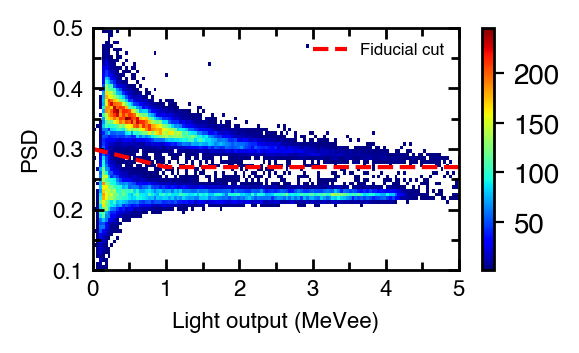

In [6]:
# plot the PSD LO in trigger
fig = fig_pre_def(7.5,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(pro_data['Tri_LO'],pro_data['Tri_PSD'], bins=(150, 80),cmin=1,cmax=250, cmap=plt.cm.jet)

Tri_Fed_cut_x = np.arange(0,8,0.01)
Tri_Fed_cut_y = Tri_Fed_cut_x*-0.03 + 0.3
Tri_Fed_cut_y[100:]=0.27
plt.plot(Tri_Fed_cut_x,Tri_Fed_cut_y,'--r',label='Fiducial cut')

fig_post_def(xlim =(0,5),xticks=(1,0.5)
             ,ylim = (0.1,0.5),yticks=(0.1,0.05)
             ,xlabel = 'Light output (MeVee)',ylabel = 'PSD')
plt.colorbar(ticks=[0, 50,100,150,200,250])
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/PSD_tri.svg', format="svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


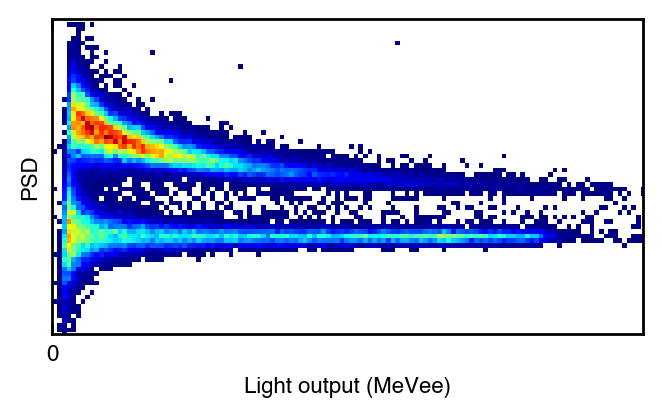

In [7]:
# plot the PSD LO in trigger
fig = fig_pre_def(7.5,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(pro_data['Tri_LO'],pro_data['Tri_PSD'], bins=(150, 80),cmin=1, cmap=plt.cm.jet)

Tri_Fed_cut_x = np.arange(0,8,0.01)
Tri_Fed_cut_y = Tri_Fed_cut_x*-0.03 + 0.3
Tri_Fed_cut_y[100:]=0.27
#plt.plot(Tri_Fed_cut_x,Tri_Fed_cut_y,'--r',label='Fiducial cut')

fig_post_def(xlim =(0,5),xticks=(100,100)
             ,ylim = (0.1,0.5),yticks=(100,100)
             ,xlabel = 'Light output (MeVee)',ylabel = 'PSD',SVG='True')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/PSD_tri_figure.png', format="png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


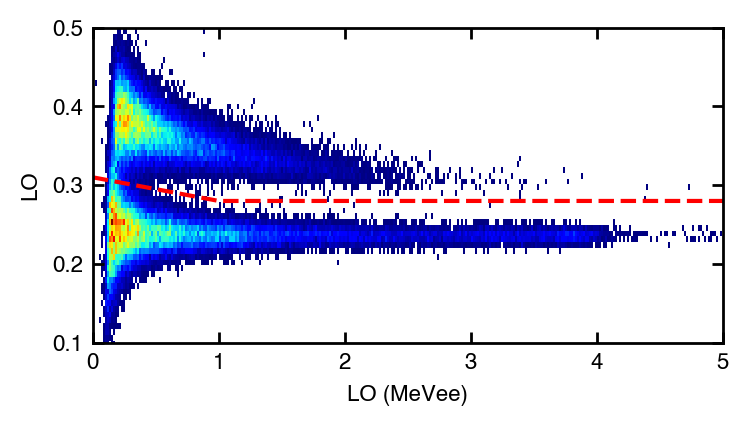

In [8]:
# plot the PSD LO in trigger
fig = fig_pre_def(8,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(pro_data['Rec_LO'],pro_data['Rec_PSD'], bins=(400, 100),cmin=1, cmap=plt.cm.jet)
Rec_Fed_cut_x = np.arange(0,10,0.01)
Rec_Fed_cut_y = Rec_Fed_cut_x*-0.03 + 0.31
Rec_Fed_cut_y[100:]=0.28
plt.plot(Rec_Fed_cut_x,Rec_Fed_cut_y,'--r')
fig_post_def(xlim =(0,5),ylim = (0.1,0.5),xlabel = 'LO (MeVee)',ylabel = 'LO')


# Particle selection 

In [9]:
Rec_Fed_cut_x = np.arange(0,10,0.01)
Rec_Fed_cut_y = Rec_Fed_cut_x*-0.03 + 0.31
Rec_Fed_cut_y[100:]=0.28

def Rec_GN_discrimination(LO,PSD): 
    global Rec_Fed_cut_x,Rec_Fed_cut_y
    LO_int = np.round(LO*100,0).astype(int)
    corresponded_PSD = Rec_Fed_cut_y[LO_int]
    #print(corresponded_PSD)
    output=[]
    for i in np.arange(0,len(corresponded_PSD),1):
        if PSD[i] >corresponded_PSD[i]: # neutron 
            output = np.append(output,2)
        else: #gamma
            output = np.append(output,1)
    return output


Tri_Fed_cut_x = np.arange(0,10,0.01)
Tri_Fed_cut_y = Tri_Fed_cut_x*-0.03 + 0.3
Tri_Fed_cut_y[100:]=0.27


def Tri_GN_discrimination(LO,PSD): 
    global Tri_Fed_cut_x,Tri_Fed_cut_y
    LO_int = np.round(LO*100,0).astype(int)
    corresponded_PSD = Tri_Fed_cut_y[LO_int]
    #print(corresponded_PSD)
    output=[]
    for i in np.arange(0,len(corresponded_PSD),1):
        if PSD[i] >corresponded_PSD[i]: # neutron 
            output = np.append(output,2)
        else: #gamma
            output = np.append(output,1)
    return output

In [10]:

Rec_P = Rec_GN_discrimination(pro_data['Rec_LO'].values, pro_data['Rec_PSD'].values)
Tri_P = Tri_GN_discrimination(pro_data['Tri_LO'].values, pro_data['Tri_PSD'].values)

print(Rec_P[:10], len(Rec_P))
print(Tri_P[:5], len(Rec_P))
print(len(pro_data['Rec_LO']))

[1. 1. 2. 2. 2. 2. 1. 1. 1. 1.] 89484
[1. 2. 1. 1. 2.] 89484
89484


In [11]:
pd_Tri_p=pd.DataFrame(Tri_P, columns=["Tri_p"])
pd_Rec_p=pd.DataFrame(Rec_P, columns=["Rec_p"])

pro_data_temp = pd.concat([pro_data, pd_Tri_p], axis=1)
pro_data_all = pd.concat([pro_data_temp, pd_Rec_p], axis=1)
print(pro_data_all)
print(pro_data_all.shape)

       time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p
0          9.626  0.221429  0.23483      4.0  0.264423  0.300716    1.0    1.0
1        282.344  0.239130  0.15995      4.0  0.341570  0.990812    2.0    1.0
2         69.072  0.326039  0.72935      4.0  0.234056  2.323560    1.0    2.0
3        169.320  0.392308  0.21923      4.0  0.223426  2.787937    1.0    2.0
4        101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0
...          ...       ...      ...      ...       ...       ...    ...    ...
89479     72.032  0.342685  0.79487      4.0  0.248000  0.181387    1.0    2.0
89480      9.040  0.254630  0.35339      4.0  0.224823  3.256628    1.0    1.0
89481     17.312  0.229508  0.30191      4.0  0.207317  0.119566    1.0    1.0
89482     58.704  0.364615  1.03043      4.0  0.235489  1.735541    1.0    2.0
89483    169.248  0.348315  0.15527      4.0  0.322967  0.602633    2.0    2.0

[89484 rows x 8 columns]
(89484, 8)


## System delay correction

In [79]:
#mask_Rec_g_PSD_upper = raw_data['Rec_PSD'] < 0.3
#mask_Rec_g_PSD_lower = raw_data['Rec_PSD'] > 0.1
#mask_Rec_PSD_upper  = raw_data['Rec_PSD'] < 0.5
#mask_Rec_PSD_lower  = raw_data['Rec_PSD'] > 0.3
#mask_Tri_n_PSD_upper  = raw_data['Tri_PSD'] < 0.5
#mask_Tri_n_PSD_lower  = raw_data['Tri_PSD'] > 0.3
#mask_Tri_g_PSD_upper  = raw_data['Tri_PSD'] < 0.3
#mask_Tri_g_PSD_lower  = raw_data['Tri_PSD'] > 0.2

mask_Rec_n  = pro_data_all['Rec_p'] == 2
mask_Rec_g  = pro_data_all['Rec_p'] == 1
mask_Tri_n  = pro_data_all['Tri_p'] == 2
mask_Tri_g  = pro_data_all['Tri_p'] == 1

tri_g_rec_g_data   = pro_data_all[( mask_Tri_g&mask_Rec_g)]
tri_g_rec_n_data   = pro_data_all[( mask_Tri_g&mask_Rec_n)]
tri_n_rec_g_data   = pro_data_all[( mask_Tri_n&mask_Rec_g)]
tri_n_rec_n_data   = pro_data_all[( mask_Tri_n&mask_Rec_n)]
tri_g_rec_All_data = pro_data_all[( mask_Tri_g)]
tri_n_rec_All_data = pro_data_all[( mask_Tri_n)]

hist_bin   = 5*1600
hist_lower = -400
hist_upper = 400

bin_center, hist_all           = sorting(pro_data_all['time_diff'],hist_bin,hist_lower,hist_upper)
#bin_center, hist_tri_All_rec_n = sorting(pro_data['time_diff'],hist_bin,hist_lower,hist_upper)

bin_center, hist_tri_g_rec_g   = sorting(tri_g_rec_g_data['time_diff'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_g_rec_n   = sorting(tri_g_rec_n_data['time_diff'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_n   = sorting(tri_n_rec_n_data['time_diff'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_g   = sorting(tri_n_rec_g_data['time_diff'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_g_rec_all = sorting(tri_g_rec_All_data['time_diff'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_all = sorting(tri_n_rec_All_data['time_diff'],hist_bin,hist_lower,hist_upper)

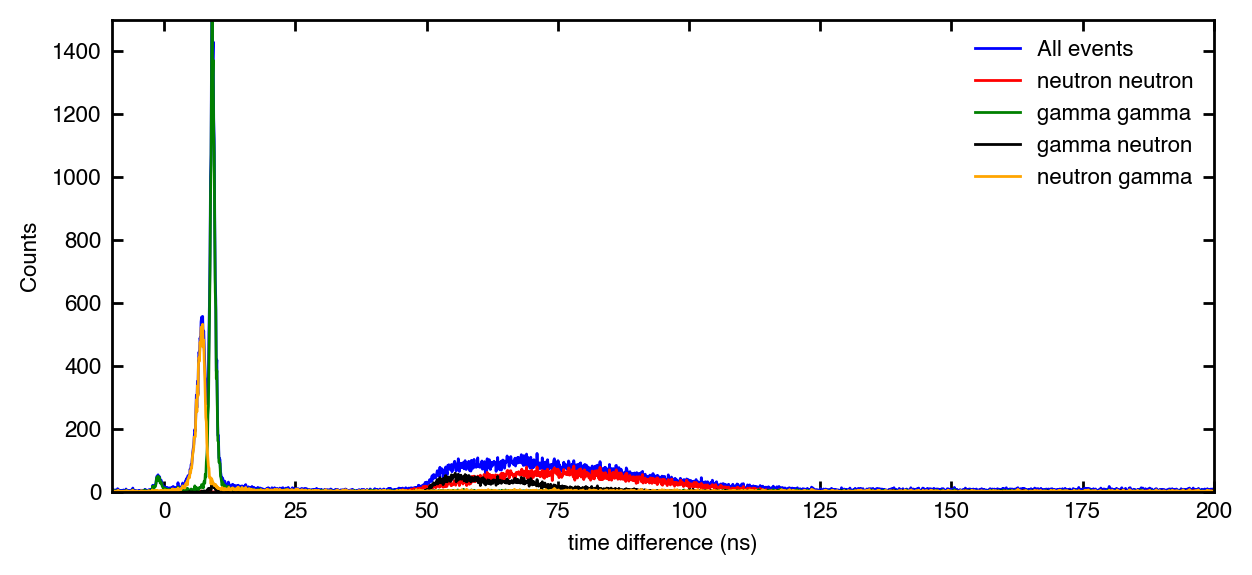

In [80]:
fig = fig_pre_def(14,6)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_all,'b',linewidth=1,label ='All events')
plt.plot(bin_center,hist_tri_n_rec_n,'r' ,linewidth=1,label ='neutron neutron')
plt.plot(bin_center,hist_tri_g_rec_g,'g' ,linewidth=1,label ='gamma gamma')
plt.plot(bin_center,hist_tri_g_rec_n,'k' ,linewidth=1,label ='gamma neutron')
plt.plot(bin_center,hist_tri_n_rec_g,color='orange' ,linewidth=1,label ='neutron gamma')
#plt.plot(bin_center,hist_tri_g_rec_all ,linewidth=1,label ='gamma all')
#plt.plot(bin_center,hist_tri_n_rec_all ,'c',linewidth=1,label ='neutron all')
fig_post_def(xlim =(-10,200),ylim = (0,1500),lg_fs=8,xlabel = 'time difference (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(1,2000)
#plt.yscale('log')

In [81]:
tri_g_rec_g_data['Tri_LO']
print((-b)/a)

NameError: name 'b' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


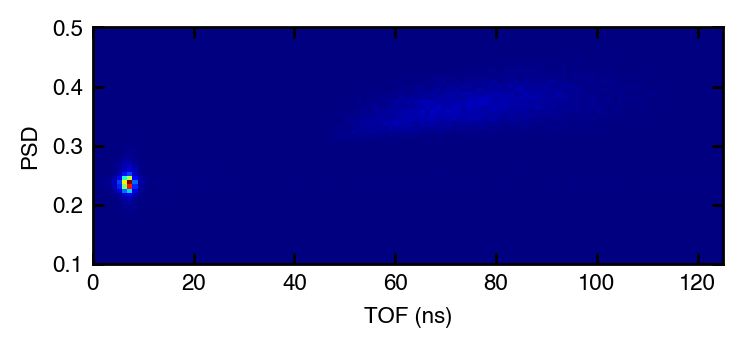

In [82]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(tri_n_rec_All_data['time_diff'],tri_n_rec_All_data['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.1,0.5),xlabel = 'TOF (ns)',ylabel = 'PSD')


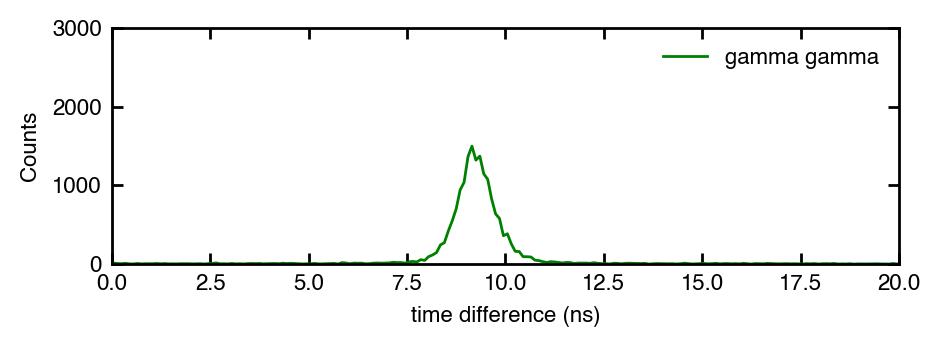

In [83]:
fig = fig_pre_def(10,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 


plt.plot(bin_center,hist_tri_g_rec_g,'g' ,linewidth=1,label ='gamma gamma')

#plt.plot(bin_center,hist_tri_g_rec_all ,linewidth=1,label ='gamma all')
#plt.plot(bin_center,hist_tri_n_rec_all ,'c',linewidth=1,label ='neutron all')
fig_post_def(xlim =(0,20),ylim = (0,3000),lg_fs=8,xlabel = 'time difference (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(1,2000)
#plt.yscale('log')

In [84]:
max_position = np.argmax(hist_tri_g_rec_g)
measured_gamma_time_diff= bin_center[max_position]
print('measured gamma different time: ',measured_gamma_time_diff,' ns')

measured gamma different time:  9.15  ns


In [87]:
# calculate the distance between source to record detector
light_speed = 299792468 #m/s
a=4
b=150+1.5*2.54
print(b)
c=(a**2+b**2-2*a*b*-0.5)**0.5
print(c)
print(10**9*0.01*(c-4)/light_speed)

153.81
155.8485036822619
5.065120704842454


In [88]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
experimental_gamma_different= ((1.5584-0.04)/light_speed)/nano_second#+0.0254*1.5-0.0254
print(experimental_gamma_different)

5.064837052543962


In [89]:
system_delay = measured_gamma_time_diff - experimental_gamma_different
#system_delay = 4.177
print(measured_gamma_time_diff-system_delay)
print(measured_gamma_time_diff-4.177)

print('system_delay  ',system_delay, '  ns')

gamma_s_D = 10**9*0.04/light_speed
print('gamma_s_D  ',gamma_s_D, '  ns')

5.064837052543962
4.973000000000001
system_delay   4.0851629474560385   ns
gamma_s_D   0.13342563362866075   ns


In [90]:
proT_data_all = pro_data_all.copy(deep=True)
proT_data_all["TOF"] = proT_data_all["time_diff"].apply(lambda x:x-system_delay)
print(proT_data_all.head())

   time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p  \
0      9.626  0.221429  0.23483      4.0  0.264423  0.300716    1.0    1.0   
1    282.344  0.239130  0.15995      4.0  0.341570  0.990812    2.0    1.0   
2     69.072  0.326039  0.72935      4.0  0.234056  2.323560    1.0    2.0   
3    169.320  0.392308  0.21923      4.0  0.223426  2.787937    1.0    2.0   
4    101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0   

          TOF  
0    5.540837  
1  278.258837  
2   64.986837  
3  165.234837  
4   97.603837  


# Visualization

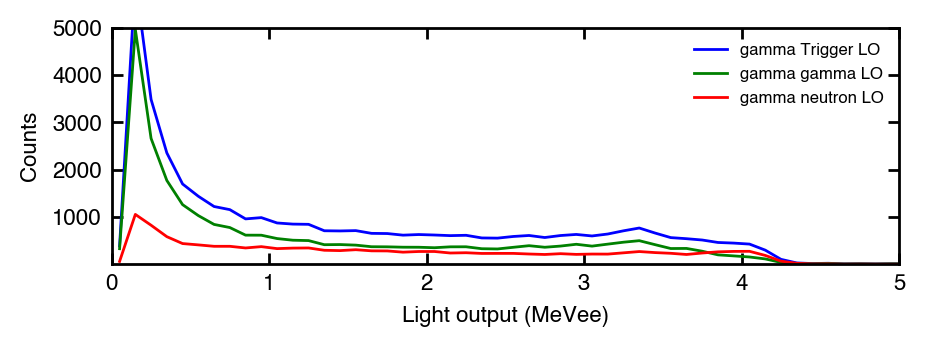

In [91]:
fig = fig_pre_def(10,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 


bin_center_LO, hist_All_LO  = sorting(pro_data_all['Tri_LO'],100,0,10)
bin_center_LO, hist_tri_g_rec_All_LO  = sorting(tri_g_rec_All_data['Tri_LO'],100,0,10)
bin_center_LO, hist_tri_g_rec_g_LO  = sorting(tri_g_rec_g_data['Tri_LO'],100,0,10)

bin_center_LO, hist_tri_g_rec_n_LO  = sorting(tri_g_rec_n_data['Tri_LO'],100,0,10)

#plt.plot(bin_center,hist_All_LO,'k',linewidth=1,label ='All Trigger LO')
plt.plot(bin_center_LO,hist_tri_g_rec_All_LO,'b',linewidth=1,label ='gamma Trigger LO')
plt.plot(bin_center_LO,hist_tri_g_rec_g_LO,'g',linewidth=1,label ='gamma gamma LO')
plt.plot(bin_center_LO,hist_tri_g_rec_n_LO,'r',linewidth=1,label ='gamma neutron LO')
fig_post_def(xlim =(0,5),ylim = (1,5000),xlabel = 'Light output (MeVee)',ylabel = 'Counts')
#plt.yscale("log")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


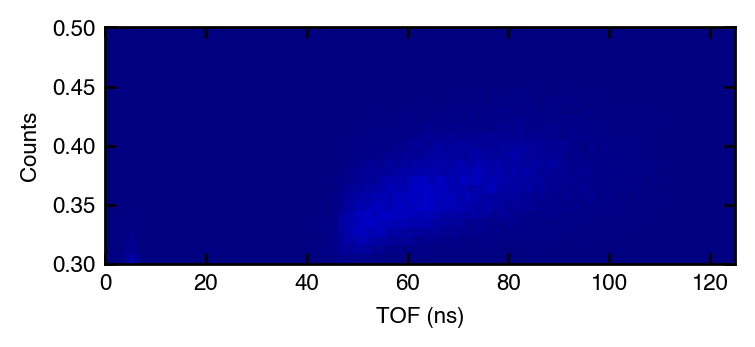

In [92]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['TOF'],proT_data_all['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.3,0.5),xlabel = 'TOF (ns)',ylabel = 'Counts')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


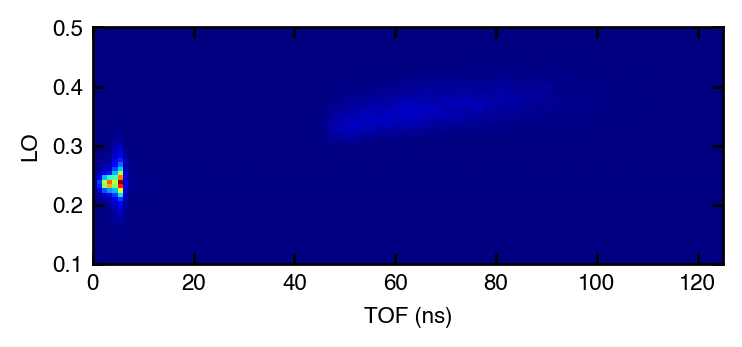

In [93]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['TOF'],proT_data_all['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.1,0.5),xlabel = 'TOF (ns)',ylabel = 'LO')


# TOF distribution
after process

In [94]:
#mask_Rec_g_PSD_upper = raw_data['Rec_PSD'] < 0.3
#mask_Rec_g_PSD_lower = raw_data['Rec_PSD'] > 0.1
#mask_Rec_PSD_upper  = raw_data['Rec_PSD'] < 0.5
#mask_Rec_PSD_lower  = raw_data['Rec_PSD'] > 0.3
#mask_Tri_n_PSD_upper  = raw_data['Tri_PSD'] < 0.5
#mask_Tri_n_PSD_lower  = raw_data['Tri_PSD'] > 0.3
#mask_Tri_g_PSD_upper  = raw_data['Tri_PSD'] < 0.3
#mask_Tri_g_PSD_lower  = raw_data['Tri_PSD'] > 0.2

mask_Rec_n  = proT_data_all['Rec_p'] == 2
mask_Rec_g  = proT_data_all['Rec_p'] == 1
mask_Tri_n  = proT_data_all['Tri_p'] == 2
mask_Tri_g  = proT_data_all['Tri_p'] == 1

tri_g_rec_g_Tdata   = proT_data_all[( mask_Tri_g&mask_Rec_g)]
tri_g_rec_n_Tdata   = proT_data_all[( mask_Tri_g&mask_Rec_n)]
tri_n_rec_g_Tdata   = proT_data_all[( mask_Tri_n&mask_Rec_g)]
tri_n_rec_n_Tdata   = proT_data_all[( mask_Tri_n&mask_Rec_n)]
tri_g_rec_All_Tdata = proT_data_all[( mask_Tri_g)]
tri_n_rec_All_Tdata = proT_data_all[( mask_Tri_n)]

hist_bin   = 4000
hist_lower = -400
hist_upper = 400
print(800/4000)
print(bin_center[np.argmax(hist_tri_g_rec_g)])

bin_center, hist_all           = sorting(proT_data_all['TOF'],hist_bin,hist_lower,hist_upper)
#bin_center, hist_tri_All_rec_n = sorting(pro_data['time_diff'],hist_bin,hist_lower,hist_upper)

bin_center, hist_tri_g_rec_g   = sorting(tri_g_rec_g_Tdata['TOF'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_g_rec_n   = sorting(tri_g_rec_n_Tdata['TOF'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_n   = sorting(tri_n_rec_n_Tdata['TOF'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_g   = sorting(tri_n_rec_g_Tdata['TOF'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_g_rec_all = sorting(tri_g_rec_All_Tdata['TOF'],hist_bin,hist_lower,hist_upper)
bin_center, hist_tri_n_rec_all = sorting(tri_n_rec_All_Tdata['TOF'],hist_bin,hist_lower,hist_upper)

0.2
9.15


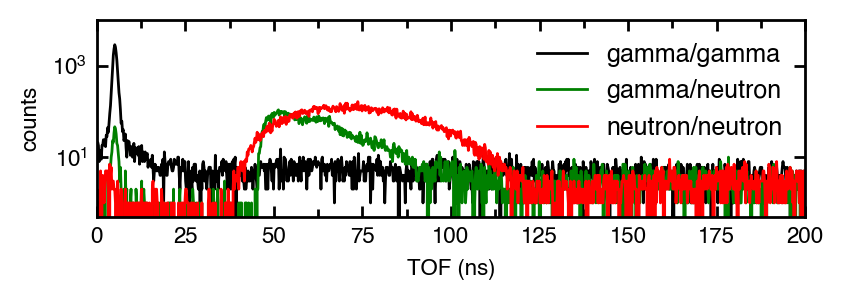

In [95]:
fig = fig_pre_def(9,2.5)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

#plt.plot(bin_center, hist_all ,'k',linewidth=1,label ='all/all')
plt.plot(bin_center, hist_tri_g_rec_g ,'k',linewidth=1,label ='gamma/gamma')
plt.plot(bin_center, hist_tri_g_rec_n,'g' ,linewidth=1,label ='gamma/neutron')
plt.plot(bin_center, hist_tri_n_rec_n,'r' ,linewidth=1,label ='neutron/neutron')
#plt.plot(bin_center, hist_tri_n_rec_g,'c' ,linewidth=1,label ='neutron/gamma')

#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,200),ylim = (1,5000)
             ,xticks=(25,12.5)
             ,xlabel = 'TOF (ns)',ylabel = 'counts',lg_fs=9,n_col=1)
#plt.xlim(-20,200)
plt.ylim(0.5,10000)
plt.yscale('log')

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_TOF.svg', format="svg")
#plt.savefig('/Users/thlin/Dropbox//NSTOF_TOF.svg', format="svg")

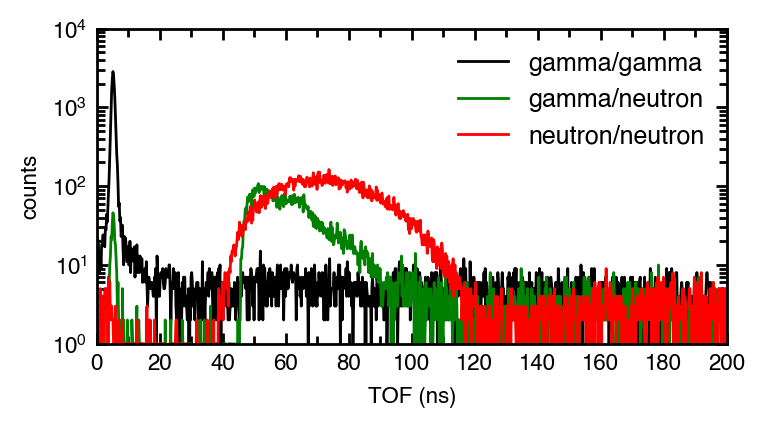

In [96]:
fig = fig_pre_def(8,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

#plt.plot(bin_center, hist_all ,'k',linewidth=1,label ='all/all')
plt.plot(bin_center, hist_tri_g_rec_g ,'k',linewidth=1,label ='gamma/gamma')
plt.plot(bin_center, hist_tri_g_rec_n,'g' ,linewidth=1,label ='gamma/neutron')
plt.plot(bin_center, hist_tri_n_rec_n,'r' ,linewidth=1,label ='neutron/neutron')

#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,200),ylim = (10,5000)
             ,xticks=(20,10)
             ,xlabel = 'TOF (ns)',ylabel = 'counts',lg_fs=9,n_col=1)
#plt.xlim(-20,200)
plt.ylim(1,10000)
plt.yscale('log')

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_TOF.svg', format="svg")

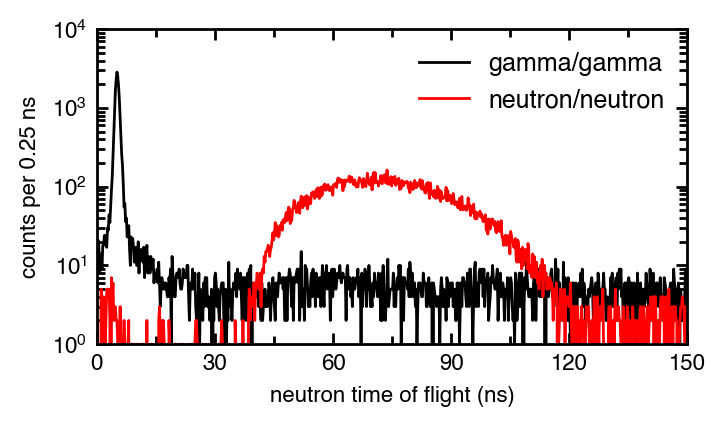

In [97]:
fig = fig_pre_def(7.5,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

#plt.plot(bin_center, hist_all ,'k',linewidth=1,label ='all/all')
plt.plot(bin_center, hist_tri_g_rec_g ,'k',linewidth=1,label ='gamma/gamma')
#plt.plot(bin_center, hist_tri_g_rec_n,'g' ,linewidth=1,label ='gamma/neutron')
plt.plot(bin_center, hist_tri_n_rec_n,'r' ,linewidth=1,label ='neutron/neutron')
#plt.axvline(35)
#plt.axvline(125)
#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,150),ylim = (10,5000)
             ,xticks=(30,15)
             ,xlabel = 'neutron time of flight (ns)',ylabel = 'counts per 0.25 ns',lg_fs=9,n_col=1)
#plt.xlim(-20,200)
plt.ylim(1,10000)
plt.yscale('log')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/TOF.svg', format="svg")


5.1


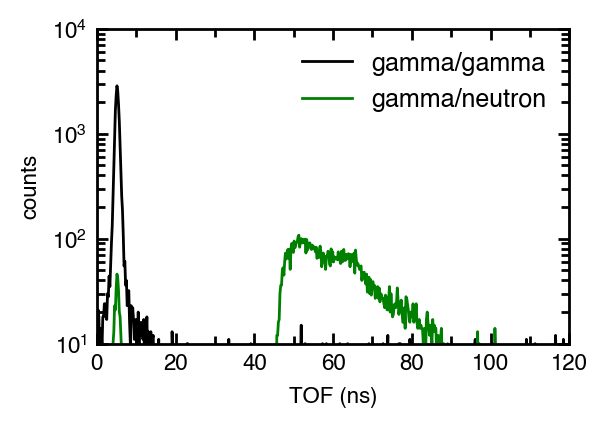

In [98]:
fig = fig_pre_def(6,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

#plt.plot(bin_center, hist_all ,'k',linewidth=1,label ='all/all')
plt.plot(bin_center, hist_tri_g_rec_g ,'k',linewidth=1,label ='gamma/gamma')
plt.plot(bin_center, hist_tri_g_rec_n,'g' ,linewidth=1,label ='gamma/neutron')
#plt.plot(bin_center, hist_tri_n_rec_n,'r' ,linewidth=1,label ='neutron/neutron')

#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,120),ylim = (10,5000)
             ,xticks=(20,10)
             ,xlabel = 'TOF (ns)',ylabel = 'counts',lg_fs=9,n_col=1)
#plt.xlim(-20,200)
plt.ylim(10,10000)
plt.yscale('log')
print((bin_center[int(np.argmax(hist_tri_g_rec_g))]))
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_TOF.svg', format="svg")

# time resolution

In [99]:
def gauss_wo_baseline(x,  A, x0, sigma,y0):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))+y0

def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma,0], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

In [100]:
print(10**9*(1.55848-0.04)/light_speed)


5.065103903811219


5.05
[ 1.33816712e+03  5.14941157e+00 -4.34928763e-01  4.24405691e+01]
standard deviation:   0.4349287631668859
standard deviation:   1.0242572372580163


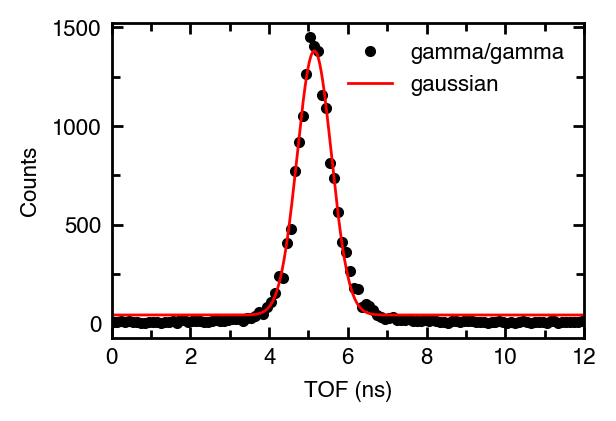

In [101]:
fig = fig_pre_def(6,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
#bin_center, hist_tri_g_rec_g_fine   = sorting(tri_g_rec_g_data['TOF'],1000,0,20)
#plt.plot(bin_center,hist_tri_g_rec_g_fine,'g',linewidth=1,label ='gamma/gamma')
bin_center, hist_tri_g_rec_g   = sorting(tri_g_rec_g_Tdata['TOF'],8000,-400,400)

print(bin_center[4050])
ranga_a = 4026
range_b = 4070
popt = gauss_fit_wo_baseline(bin_center[ranga_a:range_b], hist_tri_g_rec_g[ranga_a:range_b])
gauss_y = gauss_wo_baseline(np.arange(0,20,0.0001),  popt[0],popt[1],popt[2],popt[3])

plt.plot(bin_center,hist_tri_g_rec_g,'.k' ,linewidth=1,label ='gamma/gamma')
plt.plot(np.arange(0,20,0.0001),gauss_y,'r' ,linewidth=1,label ='gaussian')

fig_post_def(xlim =(0,12),xticks=(2,1)
             #,ylim = (0,1100)
             ,yticks=(500,250)
             ,lg_fs=8,xlabel = 'TOF (ns)',ylabel = 'Counts')
print(popt)
print('standard deviation:  ', abs(popt[2]))
print('standard deviation:  ', 2.355*abs(popt[2]))

# Geometry calculation

In [102]:
import scipy.linalg as la
import math
s = np.array([0,-4])
tri_far_corner = np.array([2.54,-2.54])
rec_far_corner = np.array([-75*3**0.5-1.5*2.54,75+1.5*2.54])

ba = s - tri_far_corner
bc = rec_far_corner - tri_far_corner
cosine_angle = np.dot(ba, bc) / (la.norm(ba) * la.norm(bc))
angle = np.arccos(cosine_angle)
print (math.dist(rec_far_corner, tri_far_corner),' cm')
print (np.degrees(angle))


158.69128329624584  cm
60.729633703205806


In [103]:
s = np.array([0,-4])
tri_far_corner = np.array([-2.54,2.54])
rec_far_corner = np.array([-75+1.5*2.54,75*3**0.5-1.5*2.54])

ba = s - tri_far_corner
bc = rec_far_corner - tri_far_corner
cosine_angle = np.dot(ba, bc) / (la.norm(ba) * la.norm(bc))
angle = np.arccos(cosine_angle)
print (math.dist(rec_far_corner, tri_far_corner),' cm')
print (np.degrees(angle))

141.34484994434936  cm
172.16734351679085


In [104]:
s = np.array([0,-4])
tri_far_corner = np.array([0,0])
rec_far_corner = np.array([-75*3**0.5,75])

ba = s - tri_far_corner
bc = rec_far_corner - tri_far_corner
cosine_angle = np.dot(ba, bc) / (la.norm(ba) * la.norm(bc))
angle = np.arccos(cosine_angle)
print (math.dist(rec_far_corner, tri_far_corner),' cm')
print (np.degrees(angle))

150.0  cm
120.00000000000001


In [105]:
def n_energy_to_speed(E):
    neutron_mass = 1.64749*10**-27 #kg
    speed = ((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)/10**9 #ns
    return speed #m
def energy_to_speed(E):
    distance = 2.94 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    core = (1+(E*10**6*1.6*10**-19/(neutron_mass*light_speed**2)))
    speed = ((1-core**-2)*light_speed**2)**0.5/10**9
    return speed

In [106]:
for i in np.arange(0,10,1):
    print(0.08/energy_to_speed(i))

inf
5.744842627603327
4.065504448256685
3.3221533194548045
2.879391531809848
2.577482330743006
2.3548031892602896
2.1818773026370604
2.0425985457263662
1.9273251512361682


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_11330/1346144447.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  print(0.08/energy_to_speed(i))


mask_Rec_g_PSD_upper = proT_data_all['Rec_PSD'] < 0.3
mask_Rec_g_PSD_lower = proT_data_all['Rec_PSD'] > 0
#mask_Tri_g_PSD_upper = proT_data_all['Rec_PSD'] < 0.3
#mask_Tri_g_PSD_lower = proT_data_all['Rec_PSD'] > 0


#rec_g_data = raw_data[(mask_Tri_Ch4 & mask_Rec_LO&mask_Tri_g_PSD_upper&mask_Tri_g_PSD_lower&mask_Rec_g_PSD_upper&mask_Rec_g_PSD_lower)]
bin_center, hist  = sorting(proT_data_all['time_diff'],1600,-400,400)
bin_center, hist_neutron = sorting(proT_data['time_diff'],1600,-400,400)
#bin_center, hist_gamma = sorting(rec_g_data['time_diff'],1600,-400,400)

fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist,'b',linewidth=1,label ='All events')
plt.plot(bin_center,hist_neutron,'r' ,linewidth=1,label ='Neutron')
#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,200),ylim = (5,3000),xlabel = 'TOF (ns)',ylabel = 'Counts',lg_fs=10)
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

# Select n-n coincidnece

In [107]:
proT_data  =tri_n_rec_n_Tdata.copy()

# Time to energy

In [108]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg

    beta= distance/(light_speed*TOF*10**-9)
    neutron_energy = (neutron_mass* light_speed**2*((1-beta**2)**-0.5)-neutron_mass* light_speed**2)*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy
def Time_to_energy_150_wo(TOF):
    distance = 1.5+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    neutron_energy = 0.5*neutron_mass*(distance/(TOF*10**-9))**2*(1.6*10**-19)**-1*(10**-6)
    return neutron_energy 

In [109]:
print(Time_to_energy_150_wo(140))
print(Time_to_energy(125))
print(Time_to_energy(35))


0.6214209374934468
0.780496705899874
10.10589478050154


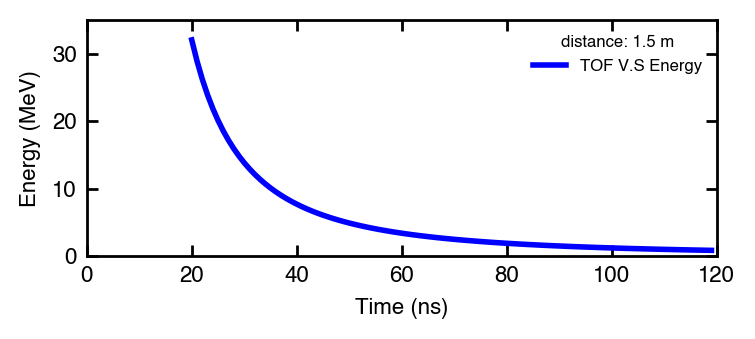

In [110]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)',title="distance: 1.5 m")


# Time to energy
def Time_to_energy_150(TOF):
    distance = 1.5381 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy

In [111]:
def energy_to_time_300(E):
    distance = 3 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns
    return TOF
def E_resolution_fun(E):
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    gamma = 1+(E*(1.6*10**-19)*(10**6)/(neutron_mass*light_speed**2))
    #print(gamma)
    delta_T = 1 # ns
    TOF = energy_to_time_300(E)
    delta_E = E*gamma*(gamma+1)*(delta_T/TOF)
    return delta_E
    

In [112]:
E_resolution_fun(30)

1.6017413558258564

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_11330/1561185703.py:5: RuntimeWarning: divide by zero encountered in divide
  TOF = distance/((2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5)*10**9 #ns


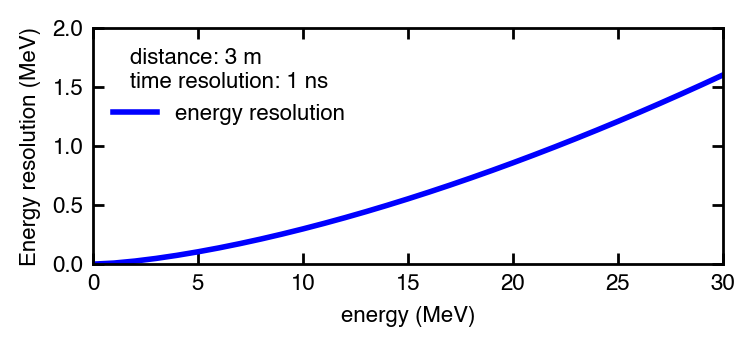

In [113]:
E_along= np.arange(0,31,1)
delta_E_along = E_resolution_fun(E_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(E_along,delta_E_along,'b',linewidth =2,label = 'energy resolution')

fig_post_def(xlim=(0,30),ylim=(0,2), xlabel ='energy (MeV)',ylabel = 'Energy resolution (MeV)'
             ,title="distance: 3 m\ntime resolution: 1 ns",lg_fs=8)


In [114]:
resolution_time =0.1 #ns

proE_data = proT_data.copy()
proE_data['Rec_E'] = Time_to_energy(np.round(proE_data['TOF']/resolution_time)*resolution_time  )

print(proE_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p  \
4     101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0   
13     61.186  0.420420  0.53591      4.0  0.331939  1.032506    2.0    2.0   
19     83.282  0.366559  0.50159      4.0  0.326531  0.776595    2.0    2.0   
22     99.688  0.378151  0.20207      4.0  0.336364  0.476116    2.0    2.0   
27     84.001  0.386139  0.33155      4.0  0.368000  0.181387    2.0    2.0   

          TOF     Rec_E  
4   97.603837  1.281278  
13  57.100837  3.758454  
19  79.196837  1.947875  
22  95.602837  1.335567  
27  79.915837  1.913789  


# Trigger LO to proton energy 
apply for all but only suitable for Trigger PSD:0.3-0.5

In [115]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [116]:
print(Light_output_exponential_method(2))
print(Light_output_exponential_method(1))
print(2*0.0138-0.0084)
print(Light_output_exponential_method(0.185))

0.545570937474092
0.20017393684761403
0.019200000000000002
0.019685897101019992


0.20017393684761403


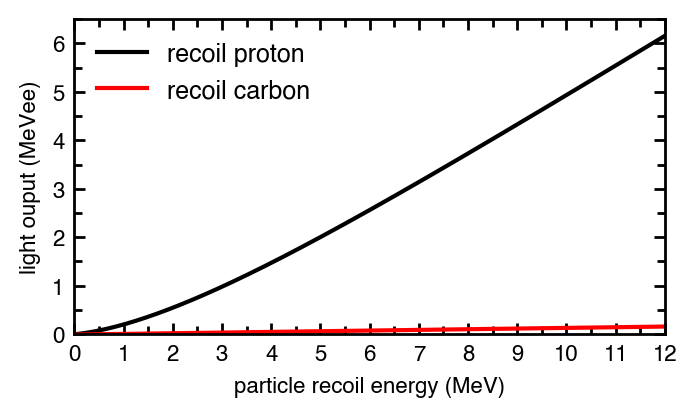

In [176]:
enegy_range= np.arange(0,12,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches[10000])
fig = fig_pre_def(7.5,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

ax.plot(enegy_range,lightoutput_2inches,'k',label ='recoil proton')
ax.plot(enegy_range,enegy_range*0.0138-0.0084,'r',label ='recoil carbon' )
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xlim=(0,12),ylim=(0,6.5)
             ,xticks=(1,0.5),yticks=(1,0.5)
             ,ylabel ='light ouput (MeVee)',xlabel = 'particle recoil energy (MeV)'
             ,lg_fs=9)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_LO.svg', format="svg")

In [118]:
P_Energy_inter[20000]

0.9993939248953054

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


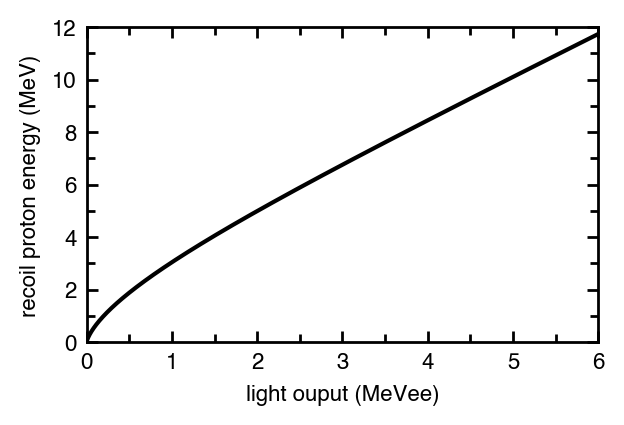

In [119]:
LO_range= np.arange(0,12,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
C_Energy_inter = LO_range*0.017
fig = fig_pre_def(6.5,4) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 2, 1) 
ax.plot(LO_range,P_Energy_inter,'k')#,label ='Exponential')
#ax.plot(lightoutput_2inches,C_Energy_inter,'r')#,label ='Exponential')
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xlim=(0,6),ylim=(0,12)
             ,xticks=(1,0.5),yticks=(2,1)
             ,xlabel ='light ouput (MeVee)',ylabel = 'recoil proton energy (MeV)'
             ,lg_fs=9)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_LO_curve.svg', format="svg")



In [120]:
2*P_Energy_inter[50000]


3.766599871399961

In [121]:
proEE_data = proE_data.copy()
proEE_data["Recoil_p_E"] = proEE_data["Tri_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
proEE_data["Total_E"] = proEE_data["Rec_E"]+proEE_data["Recoil_p_E"]

print(proEE_data.head())
print(proEE_data.shape)

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p  \
4     101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0   
13     61.186  0.420420  0.53591      4.0  0.331939  1.032506    2.0    2.0   
19     83.282  0.366559  0.50159      4.0  0.326531  0.776595    2.0    2.0   
22     99.688  0.378151  0.20207      4.0  0.336364  0.476116    2.0    2.0   
27     84.001  0.386139  0.33155      4.0  0.368000  0.181387    2.0    2.0   

          TOF     Rec_E  Recoil_p_E   Total_E  
4   97.603837  1.281278    1.650493  2.931771  
13  57.100837  3.758454    3.113708  6.872162  
19  79.196837  1.947875    2.552924  4.500799  
22  95.602837  1.335567    1.820829  3.156395  
27  79.915837  1.913789    0.933462  2.847251  
(27400, 12)


# import energy efficiency

In [122]:
rec_eff = np.loadtxt('20220211_efficiency.txt')
scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/Deg60_TOF_effciency_threshold.txt")
#scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency_threshold.txt")



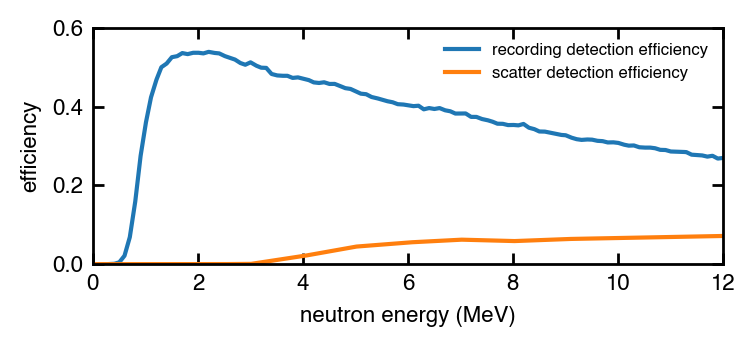

In [123]:
fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,20,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(rec_eff[:,0],rec_eff[:,1],fill_value="extrapolate") 
rec_eff_inter = interpolation_func(interpoplation_axis)

interpolation_func  = interp1d(scatter_eff[:,0],scatter_eff[:,1]/10000,fill_value="extrapolate") 
scatter_eff_inter = interpolation_func(interpoplation_axis)
plt.plot(interpoplation_axis,rec_eff_inter,'-',label = 'recording detection efficiency')
plt.plot(interpoplation_axis,scatter_eff_inter,'-',label = 'scatter detection efficiency')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

# Neutron scatter: set time window and trigger PSD 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


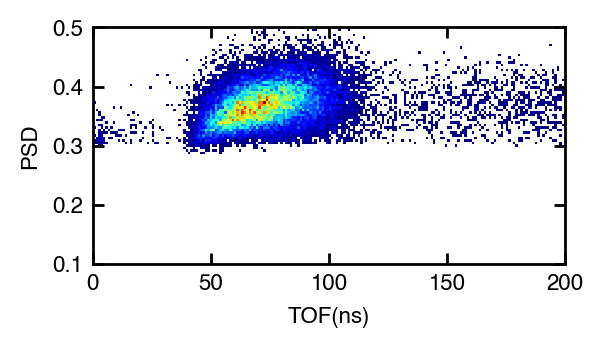

In [124]:
fig = fig_pre_def(6,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proEE_data['TOF'],proEE_data['Rec_PSD'], bins=(400, 100),cmin=1, cmap=plt.cm.jet)

fig_post_def(xlim =(0,200),ylim = (0.1,0.5),xlabel = 'TOF(ns)',ylabel = 'PSD')


In [125]:
mask_TOF_upper  = proEE_data['TOF'] < 125
mask_TOF_lower  = proEE_data['TOF'] > 35

mask_TotalE_upper  = proEE_data['Total_E'] < 13
proEEW_data = proEE_data[(mask_TOF_upper 
                        & mask_TOF_lower 
                        & mask_TotalE_upper
                       )]
print(proEEW_data.head())
print(proEEW_data.shape)

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p  \
4     101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0   
13     61.186  0.420420  0.53591      4.0  0.331939  1.032506    2.0    2.0   
19     83.282  0.366559  0.50159      4.0  0.326531  0.776595    2.0    2.0   
22     99.688  0.378151  0.20207      4.0  0.336364  0.476116    2.0    2.0   
27     84.001  0.386139  0.33155      4.0  0.368000  0.181387    2.0    2.0   

          TOF     Rec_E  Recoil_p_E   Total_E  
4   97.603837  1.281278    1.650493  2.931771  
13  57.100837  3.758454    3.113708  6.872162  
19  79.196837  1.947875    2.552924  4.500799  
22  95.602837  1.335567    1.820829  3.156395  
27  79.915837  1.913789    0.933462  2.847251  
(25174, 12)


## calculate angle

In [126]:
proEEWeff_data = proEEW_data.copy()

proEEWeff_data["Rec_eff"]     = proEEW_data["Rec_E"].apply(lambda x:rec_eff_inter[int(x*1000)])
proEEWeff_data["scatter_eff"] = proEEW_data["Total_E"].apply(lambda x:scatter_eff_inter[int(x*1000)])
#proEEWeff_data["angle"] = np.rad2deg(np.arccos(1-(2*proEE_data["Recoil_p_E"]/proEE_data["Total_E"])))
proEEWeff_data["angle"] = np.rad2deg(np.arccos(1-((2*proEE_data["Recoil_p_E"])/proEE_data["Total_E"])))
print(proEEWeff_data.head())

    time_diff   Rec_PSD   Rec_LO  Tri_Det   Tri_PSD    Tri_LO  Tri_p  Rec_p  \
4     101.689  0.363636  0.17087      4.0  0.367133  0.412857    2.0    2.0   
13     61.186  0.420420  0.53591      4.0  0.331939  1.032506    2.0    2.0   
19     83.282  0.366559  0.50159      4.0  0.326531  0.776595    2.0    2.0   
22     99.688  0.378151  0.20207      4.0  0.336364  0.476116    2.0    2.0   
27     84.001  0.386139  0.33155      4.0  0.368000  0.181387    2.0    2.0   

          TOF     Rec_E  Recoil_p_E   Total_E   Rec_eff  scatter_eff  \
4   97.603837  1.281278    1.650493  2.931771  0.493361     0.000466   
13  57.100837  3.758454    3.113708  6.872162  0.475392     0.061378   
19  79.196837  1.947875    2.552924  4.500799  0.537013     0.032500   
22  95.602837  1.335567    1.820829  3.156395  0.503117     0.003620   
27  79.915837  1.913789    0.933462  2.847251  0.536912     0.000423   

        angle  
4   97.234791  
13  84.616599  
19  97.725750  
22  98.843693  
27  69.86054

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 629.921x472.441 with 0 Axes>

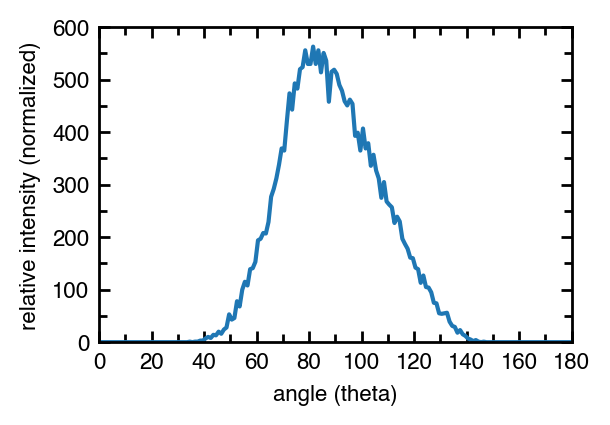

In [127]:
angle_lower = 0 # 0 MeV
angle_upper = 180 # 10 MeV
Binning = 180 # cut to 100 pieces

mask_rec_threshold = proEEWeff_data["Rec_LO"]>0
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0
proEEWeff_data_LO =proEEWeff_data[(mask_rec_threshold&mask_tri_threshold)]

Neutron_angle_theta, Neutron_angle_intensity = sorting(proEEWeff_data_LO["angle"] ,Binning,angle_lower,angle_upper)



fig_pre_def()

fig = fig_pre_def(6,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 
plt.plot(Neutron_angle_theta, Neutron_angle_intensity)

fig_post_def(xlim=(0,180),ylim=(0,600),lg_fs=12,xticks=(20,10),yticks=(100,50),xlabel='angle (theta)',ylabel='relative intensity (normalized)')

NameError: name 'proEEWeffTh_data' is not defined

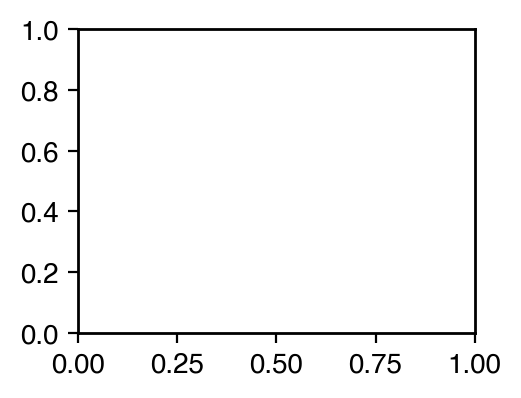

In [128]:
#print(proEEWeffTh_data.head)
fig = fig_pre_def(6.5,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

a =plt.hist2d(proEEWeffTh_data['Rec_E'], proEEWeffTh_data['Recoil_p_E']
               , bins=(50,50)
               , range=([0,10],[0,10])
               ,cmin=1, cmap=plt.cm.jet
               , density=None, weights=None)

fig_post_def(xlim=(0,10),ylim=(0,10),xticks=(1,0.5),yticks=(1,0.5)
             ,lg_fs= 9
             ,xlabel='recoil proton energy (MeV)',ylabel='scattered neutron energy (MeV)'
            #,title='without effeciency calibration'
            )

# import neutron spectrum

In [129]:
#ISO_spectrum_t = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')# old
ISO_spectrum_2000_raw = pd.read_csv('../../../../data/AmBe_Neutron_spectrum/ISO8529-1(2000).txt',header=None,sep='\s+',names=["E","B_s","B_l"])
ISO_spectrum_2021_raw = pd.read_csv('../../../../data/AmBe_Neutron_spectrum/ISO8529-1.txt',header=None,sep='\s+',names=["E","B_s","B_l"])


Lorch_1973 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')



In [130]:
def bar_plot_var(input_x,input_y):
    xs = []
    ys = [0]
    input_y_re = input_y[:-1]
    for i in range(len(input_x)):
        xs.append(input_x[i])
        xs.append(input_x[i])
    #xs.append(input_x[i])
    for j in range(len(input_y_re)):
        ys.append(input_y_re[j])
        ys.append(input_y_re[j])
    ys.append(0)
    xs = np.array(xs)
    ys = np.array(ys)
    output = np.column_stack((xs[:,np.newaxis],ys[:,np.newaxis]))
    return output

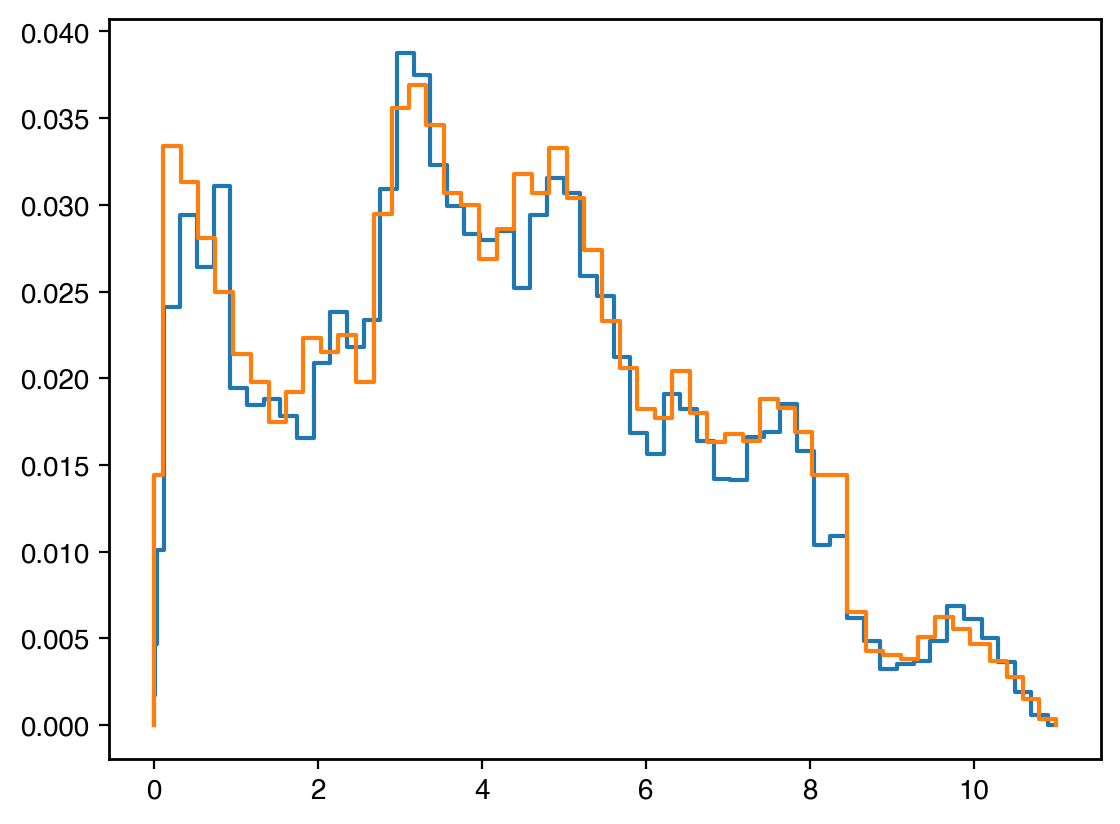

In [131]:
ISO_spectrum_2021 = bar_plot_var(ISO_spectrum_2021_raw['E'],ISO_spectrum_2021_raw['B_s'])
plt.plot(ISO_spectrum_2021[:,0],ISO_spectrum_2021[:,1])
ISO_spectrum_2000 = bar_plot_var(ISO_spectrum_2000_raw['E'],ISO_spectrum_2000_raw['B_s'])
plt.plot(ISO_spectrum_2000[:,0],ISO_spectrum_2000[:,1])

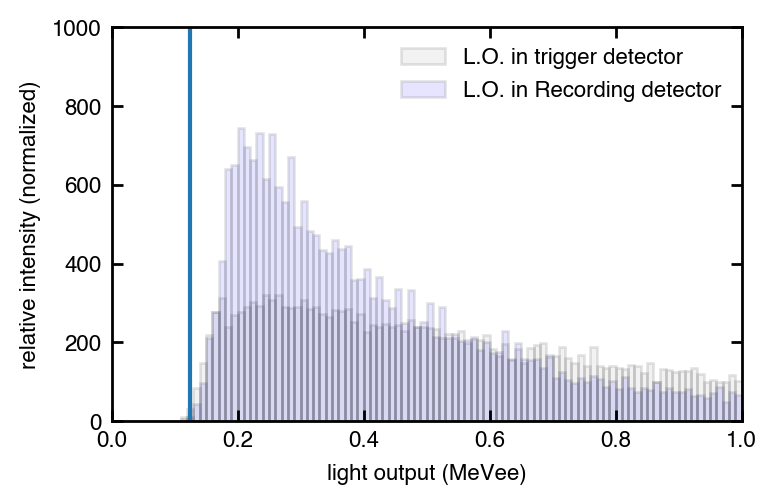

In [132]:
fig = fig_pre_def(8,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

y_tri = plt.hist(proEEWeff_data['Tri_LO'],1000,range=(0,10),color="gray",alpha=0.1,edgecolor = "k",label='L.O. in trigger detector')
y_rec = plt.hist(proEEWeff_data['Rec_LO'],1000,range=(0,10),color="blue",alpha=0.1,edgecolor = "k",label='L.O. in Recording detector')

plt.axvline(0.125)

fig_post_def(xlim=(0,1),ylim=(0,1000)
            #,xticks=(1,0.5),yticks=(0.2,0.1)
            ,lg_fs=8
            ,lb_fs=8
            ,xlabel='light output (MeVee)'
            ,ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )

In [133]:
# test
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 1 # 10 MeV
Binning = 10 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    0.21, Binning , Neutron_energy_lower, Neutron_energy_upper)
print(Neutron_E_axis)
print(Neutron_E_y)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0 0 1 0 0 0 0 0 0 0]


In [134]:
mask_rec_threshold = proEEWeff_data["Rec_LO"]>0.45
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0.1
mask_Rec_E_threshold = proEEWeff_data["Rec_E"]>3

mask_angle_lower = proEEWeff_data["angle"]>50
mask_angle_upper = proEEWeff_data["angle"]<90
proEEWeffTh_data = proEEWeff_data[(mask_rec_threshold
                                    & mask_tri_threshold
                                    #& mask_Rec_E_threshold
                                    #& mask_angle_lower
                                    & mask_angle_upper
                                    )]

Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 48 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)
bar_x, bar_y =bar_plot(Neutron_E_axis, Neutron_E_y, 0.2)

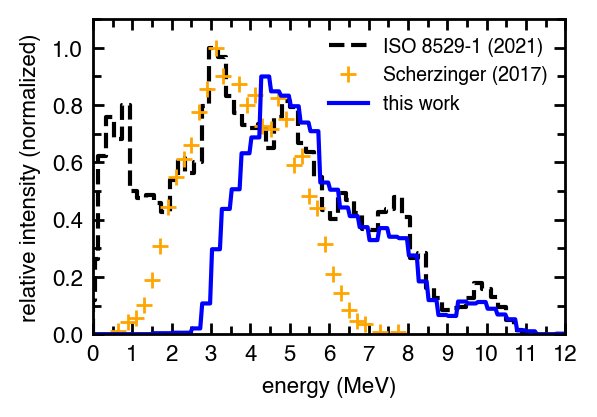

In [135]:

fig = fig_pre_def(6,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


#ax.bar(Neutron_E_axis, 0.88*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum_2021[:,0],ISO_spectrum_2021[:,1]/ISO_spectrum_2021[:,1].max(),'--k',label='ISO 8529-1 (2021)')
#plt.plot(ISO_bar_x,ISO_bar_y,'-r',label='ISO 8529-2 (2000)')

plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

ax.plot(bar_x, 0.9*bar_y/bar_y.max(),'b',label= 'this work')
ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1)
             ,lg_fs= 7
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)


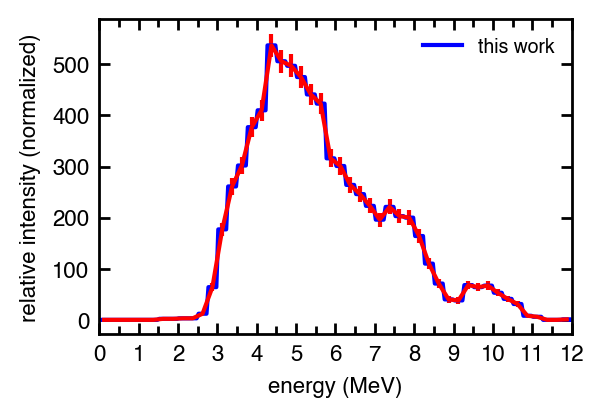

In [136]:

fig = fig_pre_def(6,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


#ax.bar(Neutron_E_axis, 0.88*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
#plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'xk',label='ISO 8529-2 (2000)')
#plt.plot(ISO_bar_x,ISO_bar_y,'-r',label='ISO 8529-2 (2000)')

#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1],'+',color='orange',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

Neutron_E_y_uncertainty = Neutron_E_y**0.5
ax.errorbar(Neutron_E_axis, Neutron_E_y,yerr=Neutron_E_y_uncertainty,color='red')
ax.plot(bar_x, bar_y,'b',label= 'this work')
ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(0,12),xticks=(1,0.5)
             #,ylim=(0,1.1),yticks=(0.2,0.1)
             ,lg_fs= 7
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)


In [137]:
print(proEEWeff_data.shape)

(25174, 15)


In [138]:
mask_rec_threshold = proEEWeff_data["Rec_LO"]>0.125
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0.125

mask_tri_threshold2 = proEEWeff_data["Tri_LO"]>0.5
mask_rec_threshold2 = proEEWeff_data["Rec_LO"]>0.5

mask_tri_threshold3 = proEEWeff_data["Tri_LO"]>0.125
mask_rec_threshold3 = proEEWeff_data["Rec_LO"]>0.5


mask_angle_upper = proEEWeff_data["angle"]<90

proEEWeffTh_data  = proEEWeff_data[(mask_rec_threshold & mask_tri_threshold  )]
proEEWeffTh_data2 = proEEWeff_data[(mask_rec_threshold2& mask_tri_threshold2 )]
proEEWeffTh_data3 = proEEWeff_data[(mask_rec_threshold3& mask_tri_threshold3 )]

Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis1, Neutron_E_y1 = sorting(proEEWeffTh_data['Total_E'] , Binning , Neutron_energy_lower, Neutron_energy_upper)
Neutron_E_axis2, Neutron_E_y2 = sorting(proEEWeffTh_data2['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)
Neutron_E_axis3, Neutron_E_y3 = sorting(proEEWeffTh_data3['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)
bar_x1, bar_y1 =bar_plot(Neutron_E_axis1, Neutron_E_y1, 0.2)
bar_x2, bar_y2 =bar_plot(Neutron_E_axis2, Neutron_E_y2, 0.2)
bar_x3, bar_y3 =bar_plot(Neutron_E_axis3, Neutron_E_y3, 0.2)

[0 0 0 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


(0.0, 0.8)

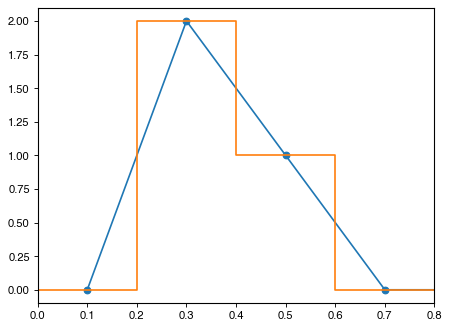

In [139]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
tttt= np.array([0.21,0.29,0.41])
Neutron_E_t_axis1, Neutron_E_t = sorting(tttt , Binning , Neutron_energy_lower, Neutron_energy_upper)
test_x, test_y  = bar_plot(Neutron_E_t_axis1, Neutron_E_t  ,0.2)
print(test_y)
plt.plot(Neutron_E_t_axis1, Neutron_E_t ,'-o')
plt.plot(test_x,test_y)
plt.xlim(0,0.8)

7.82
7.84
normalized point exp x:    7.8


<Figure size 1141.73x314.961 with 0 Axes>

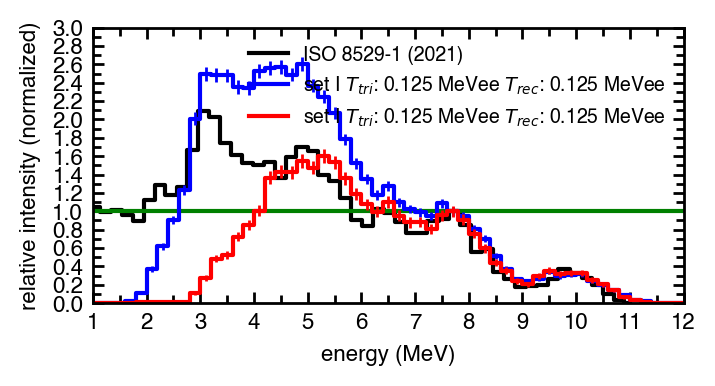

In [142]:

fig = fig_pre_def(14.5,4) # 定義圖片大小 default 8*6
fig = fig_pre_def(7.5,3.5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

ISO_spectrum = ISO_spectrum_2000.copy()
print(ISO_spectrum[75,0])#2000
normalized_point = 75

#nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
#plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2000)')



ISO_spectrum = ISO_spectrum_2021.copy()
normalized_point = 108
print(ISO_spectrum[normalized_point,0])#2021

nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2021)')



normalized_point_for_exp = 78
print('normalized point exp x:   ',bar_x1[normalized_point_for_exp])
normalized_point_err= 38#38 #32

plt.axhline(1,color='green')

shift = -0.0
bar_y11 = bar_y1/bar_y1[normalized_point_for_exp]
Neutron_E_y11 = Neutron_E_y1/Neutron_E_y1[normalized_point_err]
err_y11 = (Neutron_E_y1)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y1[normalized_point_err])
ax.plot(shift+bar_x1, bar_y11,'b',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1)



bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3*((nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err]))
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
ax.plot(shift+bar_x3, bar_y33,'r',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1)



bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])



#ax.plot(shift+bar_x1, bar_y11,'b',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
#ax.plot(shift+bar_x2, bar_y22,'g',alpha = 1,linewidth=1.5,label= r'set II $T_{tri}$: 0.5 MeVee $T_{rec}$: 0.5 MeVee')
#ax.plot(shift+bar_x2, bar_y33,'r'            ,label= r'set III $T_{tri}$: 0.125 MeVee; $T_{rec}$: 0.5 MeVee')
#ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis2, Neutron_E_y22,yerr = err_y22,fmt='None',ecolor= 'g',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1)

ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(1,12),ylim=(0,3),xticks=(1,0.5),yticks=(0.2,0.1)
             ,lg_fs= 7
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/E_spectrum.svg', format="svg")

7.82
normalized point exp x:    7.8
normalized point exp x error:    7.7


<Figure size 1141.73x314.961 with 0 Axes>

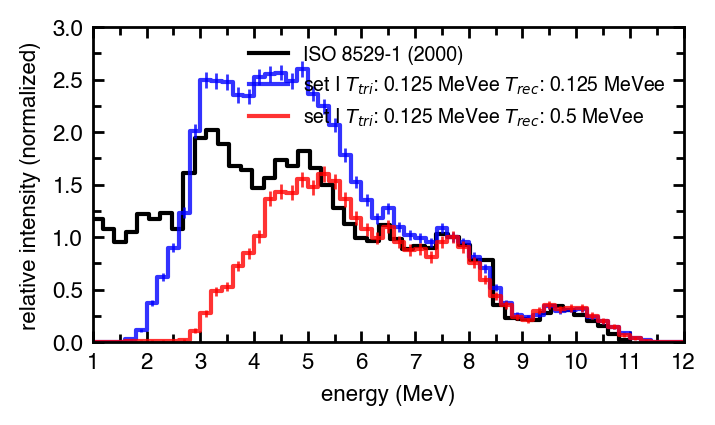

In [143]:

fig = fig_pre_def(14.5,4) # 定義圖片大小 default 8*6
fig = fig_pre_def(7.5,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 




ISO_spectrum = ISO_spectrum_2000.copy()

normalized_point = 74
print(ISO_spectrum[normalized_point,0])#2000
nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2000)')

#ISO_spectrum = ISO_spectrum_2021.copy()
#normalized_point = 108
#print(ISO_spectrum[normalized_point,0])#2021
#nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
#plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2021)')



normalized_point_for_exp = 78
print('normalized point exp x:   ',bar_x1[normalized_point_for_exp])
normalized_point_err= 38#38 #32
print('normalized point exp x error:   ',Neutron_E_axis3[normalized_point_err])

#plot 1
#plt.axhline(1,color='green')

shift = -0.0
transparent_value  =0.8
# 0.125MeVee
bar_y11 = bar_y1/bar_y1[normalized_point_for_exp]
Neutron_E_y11 = Neutron_E_y1/Neutron_E_y1[normalized_point_err]
err_y11 = (Neutron_E_y1)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y1[normalized_point_err])
ax.plot(shift+bar_x1, bar_y11,'b',alpha = transparent_value,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1,alpha = transparent_value)


#0.125MeVee + 0.5 MeVee
bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3*((nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err]))
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
ax.plot(shift+bar_x3, bar_y33,'r',alpha = transparent_value,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.5 MeVee')
ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1,alpha = transparent_value)



bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])



#ax.plot(shift+bar_x1, bar_y11,'b',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
#ax.plot(shift+bar_x2, bar_y22,'g',alpha = 1,linewidth=1.5,label= r'set II $T_{tri}$: 0.5 MeVee $T_{rec}$: 0.5 MeVee')
#ax.plot(shift+bar_x2, bar_y33,'r'            ,label= r'set III $T_{tri}$: 0.125 MeVee; $T_{rec}$: 0.5 MeVee')
#ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis2, Neutron_E_y22,yerr = err_y22,fmt='None',ecolor= 'g',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1)

ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(1,12),ylim=(0,3),xticks=(1,0.5),yticks=(0.5,0.25)
             ,lg_fs= 7
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/E_spectrum.svg', format="svg")

(0.0, 10.0)

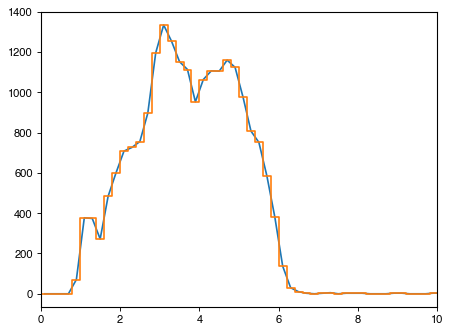

In [154]:
GTOF_spectrum=np.loadtxt('g_trigger_20221113.txt')
plt.plot(GTOF_spectrum[:,0],GTOF_spectrum[:,1])

GTOF_bar_x, GTOF_bar_y =bar_plot(GTOF_spectrum[:,0], GTOF_spectrum[:,1], 0.2)
plt.plot(GTOF_bar_x, GTOF_bar_y )
plt.xlim(0,10)

7.82
normalized point exp x:    7.8
normalized point exp x error:    7.7


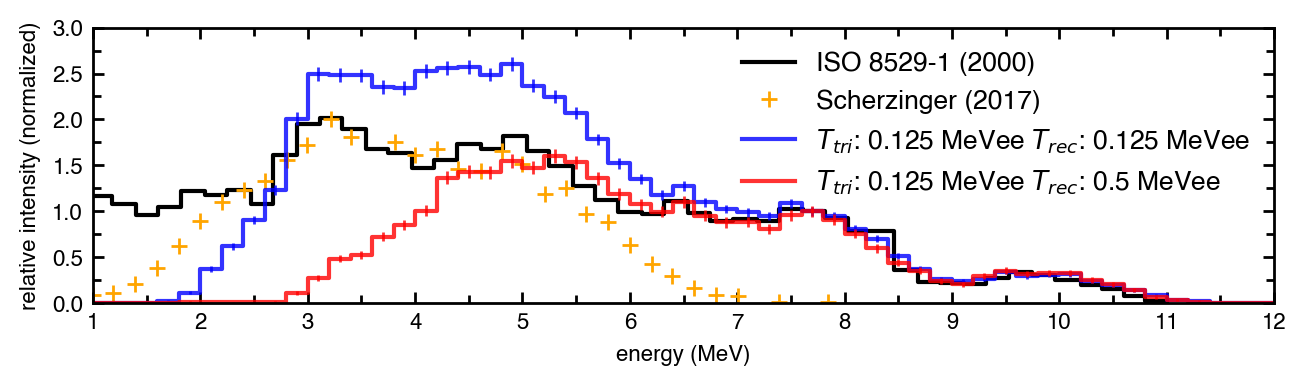

In [174]:

fig = fig_pre_def(15,3.5) # 定義圖片大小 default 8*6
#fig = fig_pre_def(7.5,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 




ISO_spectrum = ISO_spectrum_2000.copy()

normalized_point = 74
print(ISO_spectrum[normalized_point,0])#2000
nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2000)')

#ISO_spectrum = ISO_spectrum_2021.copy()
#normalized_point = 108
#print(ISO_spectrum[normalized_point,0])#2021
#nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
#plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2021)')



normalized_point_for_exp = 78
print('normalized point exp x:   ',bar_x1[normalized_point_for_exp])
normalized_point_err= 38#38 #32
print('normalized point exp x error:   ',Neutron_E_axis3[normalized_point_err])

#plot 1
plt.plot(0.1+Scherzinger_2017[:,0],2.01*Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',label='Scherzinger (2017)')


shift = -0.0
transparent_value  =0.8
# 0.125MeVee
bar_y11 = bar_y1/bar_y1[normalized_point_for_exp]
Neutron_E_y11 = Neutron_E_y1/Neutron_E_y1[normalized_point_err]
err_y11 = (Neutron_E_y1)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y1[normalized_point_err])
ax.plot(shift+bar_x1, bar_y11,'b',alpha = transparent_value,linewidth=1.5,label= r'$T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1,alpha = transparent_value)


#0.125MeVee + 0.5 MeVee
bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3*((nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err]))
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
ax.plot(shift+bar_x3, bar_y33,'r',alpha = transparent_value,linewidth=1.5,label= r'$T_{tri}$: 0.125 MeVee $T_{rec}$: 0.5 MeVee')
ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1,alpha = transparent_value)



bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])

#plt.plot(0.1+GTOF_bar_x, 2*GTOF_bar_y/GTOF_bar_y.max() ,'g', label =)

#ax.plot(shift+bar_x1, bar_y11,'b',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
#ax.plot(shift+bar_x2, bar_y22,'g',alpha = 1,linewidth=1.5,label= r'set II $T_{tri}$: 0.5 MeVee $T_{rec}$: 0.5 MeVee')
#ax.plot(shift+bar_x2, bar_y33,'r'            ,label= r'set III $T_{tri}$: 0.125 MeVee; $T_{rec}$: 0.5 MeVee')
#ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis2, Neutron_E_y22,yerr = err_y22,fmt='None',ecolor= 'g',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1)

ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(1,12),ylim=(0,3),xticks=(1,0.5),yticks=(0.5,0.25)
             ,lg_fs= 9.5
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)
#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/E_spectrum.svg', format="svg")

7.82
normalized point exp x:    7.8
normalized point exp x error:    7.7


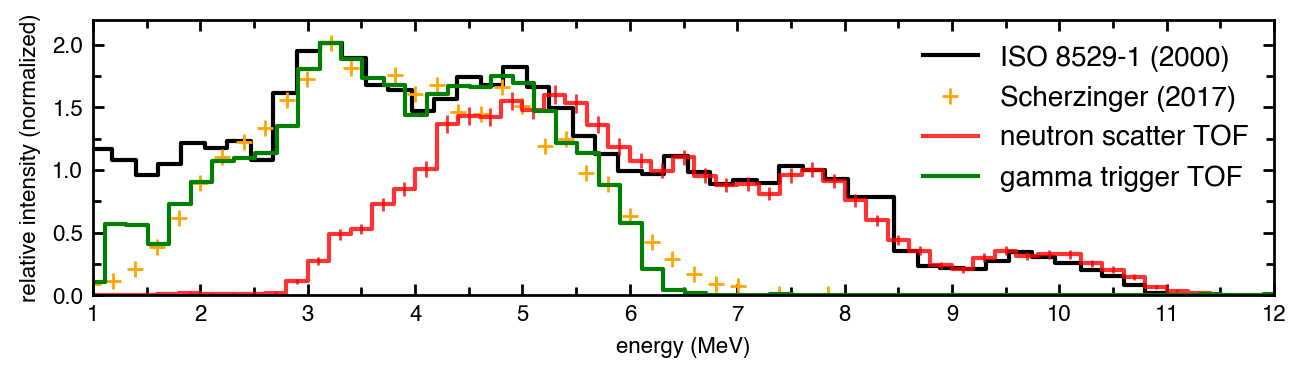

In [175]:

fig = fig_pre_def(15,3.5) # 定義圖片大小 default 8*6
#fig = fig_pre_def(7.5,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 




ISO_spectrum = ISO_spectrum_2000.copy()

normalized_point = 74
print(ISO_spectrum[normalized_point,0])#2000
nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2000)')

#ISO_spectrum = ISO_spectrum_2021.copy()
#normalized_point = 108
#print(ISO_spectrum[normalized_point,0])#2021
#nor_ISO_spectrum = ISO_spectrum[:,1]/ISO_spectrum[normalized_point,1]
#plt.plot(ISO_spectrum[:,0],nor_ISO_spectrum,'-k',label='ISO 8529-1 (2021)')



normalized_point_for_exp = 78
print('normalized point exp x:   ',bar_x1[normalized_point_for_exp])
normalized_point_err= 38#38 #32
print('normalized point exp x error:   ',Neutron_E_axis3[normalized_point_err])

#plot 1
plt.plot(0.1+Scherzinger_2017[:,0],2.01*Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',label='Scherzinger (2017)')

shift = -0.0
transparent_value  =0.8
# 0.125MeVee
bar_y11 = bar_y1/bar_y1[normalized_point_for_exp]
Neutron_E_y11 = Neutron_E_y1/Neutron_E_y1[normalized_point_err]
err_y11 = (Neutron_E_y1)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y1[normalized_point_err])
#ax.plot(shift+bar_x1, bar_y11,'b',alpha = transparent_value,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
#ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1,alpha = transparent_value)


#0.125MeVee + 0.5 MeVee
bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3*((nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err]))
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
ax.plot(shift+bar_x3, bar_y33,'r',alpha = transparent_value,linewidth=1.5,label= r'neutron scatter TOF')
ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1,alpha = transparent_value)



bar_y33 = bar_y3* (nor_ISO_spectrum[normalized_point]/bar_y3[normalized_point_for_exp])
Neutron_E_y33 = Neutron_E_y3* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])
err_y33 = (Neutron_E_y3)**0.5* (nor_ISO_spectrum[normalized_point]/Neutron_E_y3[normalized_point_err])

plt.plot(0.11+GTOF_bar_x, 2.01*GTOF_bar_y/GTOF_bar_y.max() ,'g', label ='gamma trigger TOF')

#ax.plot(shift+bar_x1, bar_y11,'b',alpha = 1,linewidth=1.5,label= r'set I $T_{tri}$: 0.125 MeVee $T_{rec}$: 0.125 MeVee')
#ax.plot(shift+bar_x2, bar_y22,'g',alpha = 1,linewidth=1.5,label= r'set II $T_{tri}$: 0.5 MeVee $T_{rec}$: 0.5 MeVee')
#ax.plot(shift+bar_x2, bar_y33,'r'            ,label= r'set III $T_{tri}$: 0.125 MeVee; $T_{rec}$: 0.5 MeVee')
#ax.errorbar(shift+Neutron_E_axis1, Neutron_E_y11,yerr = err_y11,fmt='None',ecolor= 'b',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis2, Neutron_E_y22,yerr = err_y22,fmt='None',ecolor= 'g',linewidth=1)
#ax.errorbar(shift+Neutron_E_axis3, Neutron_E_y33,yerr = err_y33,fmt='None',ecolor= 'r',linewidth=1)

ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(1,12),ylim=(0,2.2),xticks=(1,0.5),yticks=(0.5,0.25)
             ,lg_fs= 10
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)
#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/E_spectrum.svg', format="svg")

In [ ]:
# should consider threshold in simulation data
sim= np.loadtxt('../Neutron_scatter_exp_simulation/simulation_output.txt')
fig = fig_pre_def(7,3.5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 
Rec_LO_axis1, Rec_LO_y1 = sorting(proEE_data['Rec_LO'] , 100 , 0, 10)
plt.plot(Rec_LO_axis1, Rec_LO_y1,'b',label ='experiment')
plt.plot(sim[:,0], sim[:,1],'r',label ='simualtion 8 MeV Neutron')

fig_post_def(xlim=(0,10),ylim=(0,10),xticks=(1,0.5),yticks=(1,0.5)
             ,lg_fs= 9
             ,xlabel='light output (MeVee)',ylabel='intensity')
plt.ylim(0.8,10000)
plt.yscale('log')

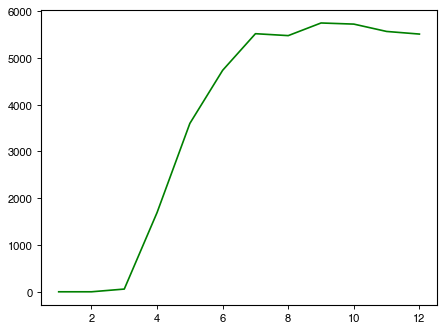

In [503]:
NSTOF_eff_x=np.array([1. ,  2. , 3. ,4. ,5. ,6. ,7. ,8. ,9. ,10.,11,12])

NSTOF_eff1=np.array([0. , 377., 1187. ,1465. ,1551. ,1505. ,1428. ,1282. ,1239. ,1195., 1046.])
NSTOF_eff2=np.array([  0. ,  0. , 11., 180. ,402. ,494. ,562. ,545. ,582. ,608. ,557.])
#NSTOF_eff3=np.array([ 0.  , 0. ,  0. , 43., 220. ,338., 431. ,458., 505., 539. ,495.])
NSTOF_eff3=np.array([   0. ,   0.  , 58. ,1693. ,3598. ,4733. ,5515. ,5474., 5744., 5720., 5563., 5507.])
#NSTOF_eff3=np.array([  0.,  3992. ,11758. ,14440. ,15525. ,14804. ,14314. ,12801. ,12218. ,11426., 10417.])

#plt.plot(NSTOF_eff_x,NSTOF_eff1,'b')
#plt.plot(NSTOF_eff_x,NSTOF_eff2,'r')
plt.plot(NSTOF_eff_x,NSTOF_eff3,'g')

(0.0, 1.0)

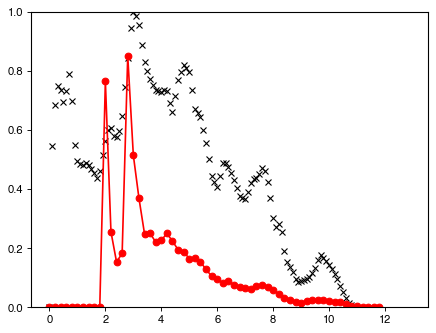

In [251]:
NSTOF_eff_nor_y3 = interpolation_function(NSTOF_eff_x,NSTOF_eff3,Neutron_E_axis3)
#y3 = interpolation_function(bar_x2, bar_y33,Neutron_E_axis3)

#plt.plot(Neutron_E_axis,NSTOF_eff_nor_y3,'-xg')
correct_y3 = []
for i in np.arange(0,len(NSTOF_eff_nor_y3),1):
    
    if NSTOF_eff_nor_y3[i] != 0:
        correct_y3 = np.append(correct_y3,Neutron_E_y3[i]/(NSTOF_eff_nor_y3[i]/1000))
    else:
        correct_y3 = np.append(correct_y3,0)

plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'xk',label='ISO 8529-2 (2000)')   
plt.plot(-0.1+Neutron_E_axis3,0.85*correct_y3/correct_y3.max(),'-or')
plt.ylim(0,1)

[1.         1.         1.         1.         1.         0.73246024
 0.98503274 0.92609916 1.11131899 1.20673527 1.0383536 ]


ValueError: operands could not be broadcast together with shapes (60,) (48,) 

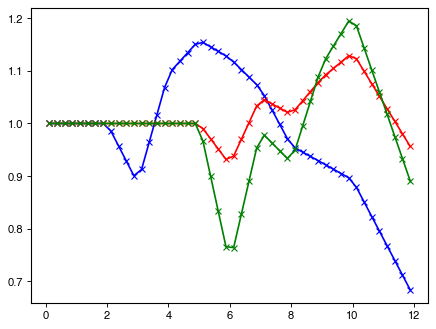

In [252]:
NSTOF_eff_x=np.array([1. ,  2. , 3. ,4. ,5. ,6. ,7. ,8. ,9. ,10.,11])

NSTOF_eff1=np.array([0. , 377., 1187. ,1465. ,1551. ,1505. ,1428. ,1282. ,1239. ,1195., 1046.])
NSTOF_eff2=np.array([  0. ,  0. , 11., 180. ,402. ,494. ,562. ,545. ,582. ,608. ,557.])
#NSTOF_eff2=np.array([ 0.  , 0. , 59. ,311. ,550. ,619. ,680., 628., 674., 688. ,646.])# 0.1 0.4


#NSTOF_eff3=np.array([  0.  , 0. ,  0. , 43., 220. ,338., 431. ,458., 505., 539. ,495.])
NSTOF_eff3=np.array([ 0.  , 0. ,  0. , 33., 181. ,261., 351. ,330., 396., 430. ,370.])


NSTOF_eff_ave1 = np.average(NSTOF_eff1[3:])
NSTOF_eff_nor1 = NSTOF_eff1/NSTOF_eff_ave1
NSTOF_eff_nor1[:2]=1

NSTOF_eff_ave2 = np.average(NSTOF_eff2[4:])
NSTOF_eff_nor2 = NSTOF_eff2/NSTOF_eff_ave2
NSTOF_eff_nor2[:5]=1

NSTOF_eff_ave3 = np.average(NSTOF_eff3[5:])
NSTOF_eff_nor3 = NSTOF_eff3/NSTOF_eff_ave3
NSTOF_eff_nor3[:5]=1
print(NSTOF_eff_nor3)

#print(NSTOF_eff_nor)

NSTOF_eff_nor_y1 = interpolation_function(NSTOF_eff_x,NSTOF_eff_nor1,Neutron_E_axis)
NSTOF_eff_nor_y2 = interpolation_function(NSTOF_eff_x,NSTOF_eff_nor2,Neutron_E_axis)
NSTOF_eff_nor_y3 = interpolation_function(NSTOF_eff_x,NSTOF_eff_nor3,Neutron_E_axis)
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y1,'-xb')
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y2,'-xr')
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y3,'-xg')


bar_x1, bar_y1 =bar_plot(Neutron_E_axis1, Neutron_E_y1/NSTOF_eff_nor_y1, 0.2)
bar_x2, bar_y2 =bar_plot(Neutron_E_axis2, Neutron_E_y2/NSTOF_eff_nor_y2, 0.2)
bar_x3, bar_y3 =bar_plot(Neutron_E_axis3, Neutron_E_y3/NSTOF_eff_nor_y3, 0.2)

NSTOF_eff_x=np.array([1. ,  2. , 3. ,4. ,5. ,6. ,7. ,8. ,9. ,10.,11])

NSTOF_eff1=np.array([0. , 377., 1187. ,1465. ,1551. ,1505. ,1428. ,1282. ,1239. ,1195., 1046.])
NSTOF_eff2=np.array([  0. ,  0. , 11., 180. ,402. ,494. ,562. ,545. ,582. ,608. ,557.])
#NSTOF_eff2=np.array([ 0.  , 0. , 59. ,311. ,550. ,619. ,680., 628., 674., 688. ,646.])# 0.1 0.4
NSTOF_eff3=np.array([ 0.  , 0. ,  0. , 43., 216. ,311., 384. ,409., 457., 486. ,455.])

NSTOF_eff_nor_y1 = interpolation_function(NSTOF_eff_x,NSTOF_eff1,Neutron_E_axis)
NSTOF_eff_nor_y2 = interpolation_function(NSTOF_eff_x,NSTOF_eff2,Neutron_E_axis)
NSTOF_eff_nor_y3 = interpolation_function(NSTOF_eff_x,NSTOF_eff3,Neutron_E_axis)
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y1,'-xb')
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y2,'-xr')
plt.plot(Neutron_E_axis,NSTOF_eff_nor_y3,'-xg')

E_y1 = []
for i in np.arange(0,len(NSTOF_eff_nor_y1),1):
    if NSTOF_eff_nor_y1[i]==0:
        E_y1= np.append(E_y1,0)
    else:
        E_y1 = np.append(E_y1,Neutron_E_y1/NSTOF_eff_nor_y1)

E_y2 = []
for i in np.arange(0,len(NSTOF_eff_nor_y2),1):
    if NSTOF_eff_nor_y2[i]==0:
        E_y2= np.append(E_y2,0)
    else:
        E_y2 = Neutron_E_y2/NSTOF_eff_nor_y2

E_y3 = []
for i in np.arange(0,len(NSTOF_eff_nor_y3),1):
    if NSTOF_eff_nor_y3[i]==0:
        E_y3= np.append(E_y3,0)
    else:
        E_y3 = np.append(E_y3,Neutron_E_y3/NSTOF_eff_nor_y3)
        #E_y3 = Neutron_E_y3/NSTOF_eff_nor_y3



#E_y1= Neutron_E_y1/NSTOF_eff_nor_y1
#E_y2= Neutron_E_y2/NSTOF_eff_nor_y2
#E_y3= Neutron_E_y3/NSTOF_eff_nor_y3

bar_x1, bar_y1 =bar_plot(Neutron_E_axis1, E_y1, 0.2)
bar_x2, bar_y2 =bar_plot(Neutron_E_axis2, E_y2, 0.2)
bar_x3, bar_y3 =bar_plot(Neutron_E_axis3, E_y3, 0.2)


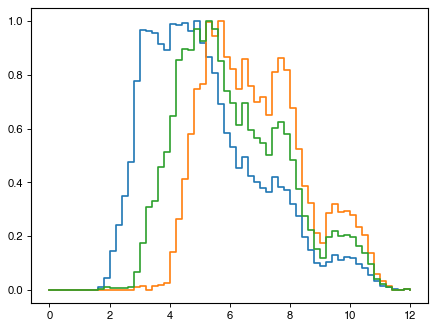

In [253]:
plt.plot(bar_x1, bar_y1/bar_y1.max())
plt.plot(bar_x2, bar_y2/bar_y2.max())
plt.plot(bar_x3, bar_y3/bar_y3.max())

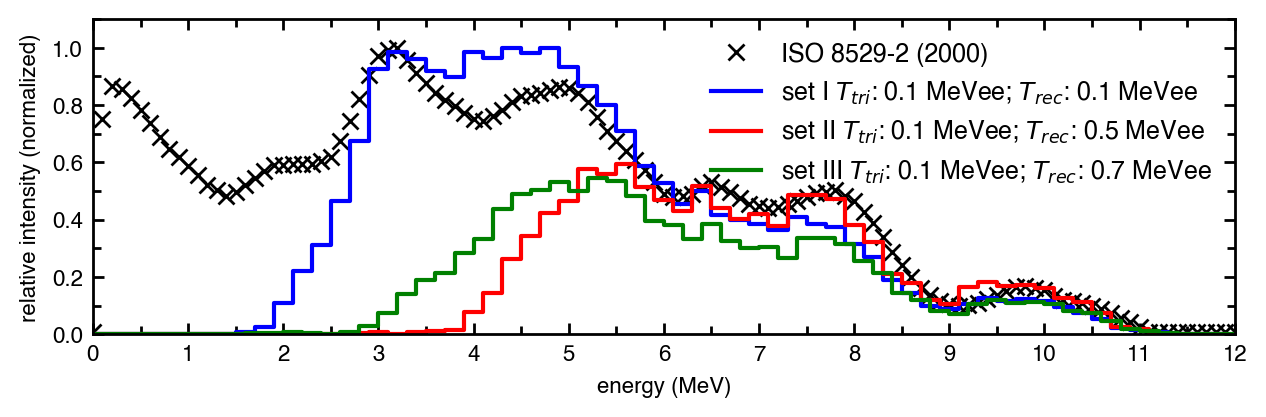

In [593]:

fig = fig_pre_def(14.5,4) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

nor1 = ISO_spectrum[23,1]/ISO_spectrum[:,1].max()
bar_y22 = nor1*(bar_y2/bar_y2.max())

nor2 = ISO_spectrum[24,1]/ISO_spectrum[:,1].max()
bar_y33 = nor2*(bar_y3/bar_y3.max())

#ax.bar(Neutron_E_axis, 0.88*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'xk',label='ISO 8529-2 (2000)')
#plt.plot(ISO_bar_x,ISO_bar_y,'-r',label='ISO 8529-2 (2000)')

#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')



ax.plot(-0.1+bar_x1, bar_y1/bar_y1.max(),'b',label= r'set I $T_{tri}$: 0.1 MeVee; $T_{rec}$: 0.1 MeVee')
ax.plot(-0.1+bar_x2, bar_y22,'r'            ,label= r'set II $T_{tri}$: 0.1 MeVee; $T_{rec}$: 0.5 MeVee')
ax.plot(bar_x3, 0.9*bar_y33,'g'            ,label= r'set III $T_{tri}$: 0.1 MeVee; $T_{rec}$: 0.7 MeVee')
ax.set_xlabel("energy (MeV)",fontsize=18)
ax.set_ylabel("counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1)
             ,lg_fs= 9
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            #,title='without effeciency calibration'
            )
#plt.legend(fontsize=18)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_exp_th_comparison.svg', format="svg")

NameError: name 'NSTOF_eff_nor_y' is not defined

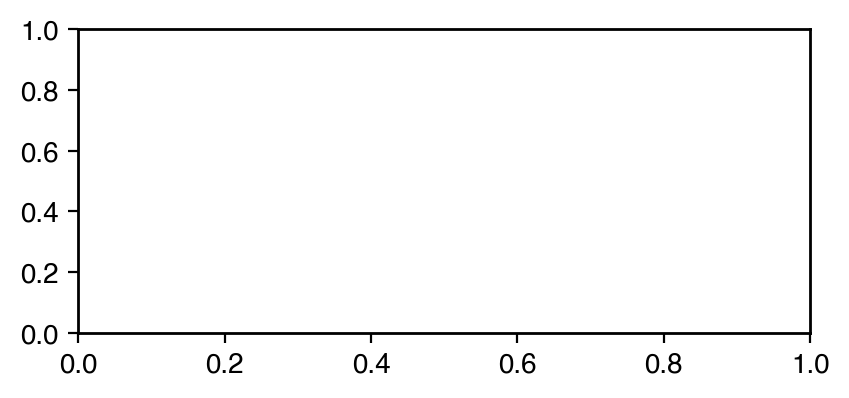

In [594]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

Neutron_E2= Neutron_E_y/NSTOF_eff_nor_y
#ax.bar(Neutron_E_axis, 0.87*Neutron_E2/Neutron_E2.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

plt.plot(Neutron_E_axis, E_y1/E_y1.max())
plt.plot(Neutron_E_axis, 0.85*E_y2/E_y2.max())
plt.plot(Neutron_E_axis, 0.85*E_y3/E_y3.max())
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)


NameError: name 'NSTOF_eff_nor_y' is not defined

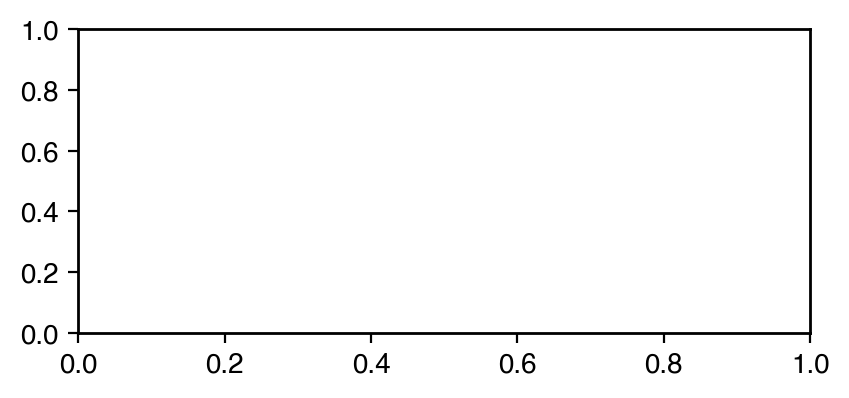

In [75]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

Neutron_E2= Neutron_E_y/NSTOF_eff_nor_y
ax.bar(Neutron_E_axis, 0.87*Neutron_E2/Neutron_E2.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)


In [76]:
eff_flat_correction = np.loadtxt('../../AmBe_neutron_scatter_TOF/Neutron_scatter_exp_simulation/202306_flat_spectrum_output.txt')

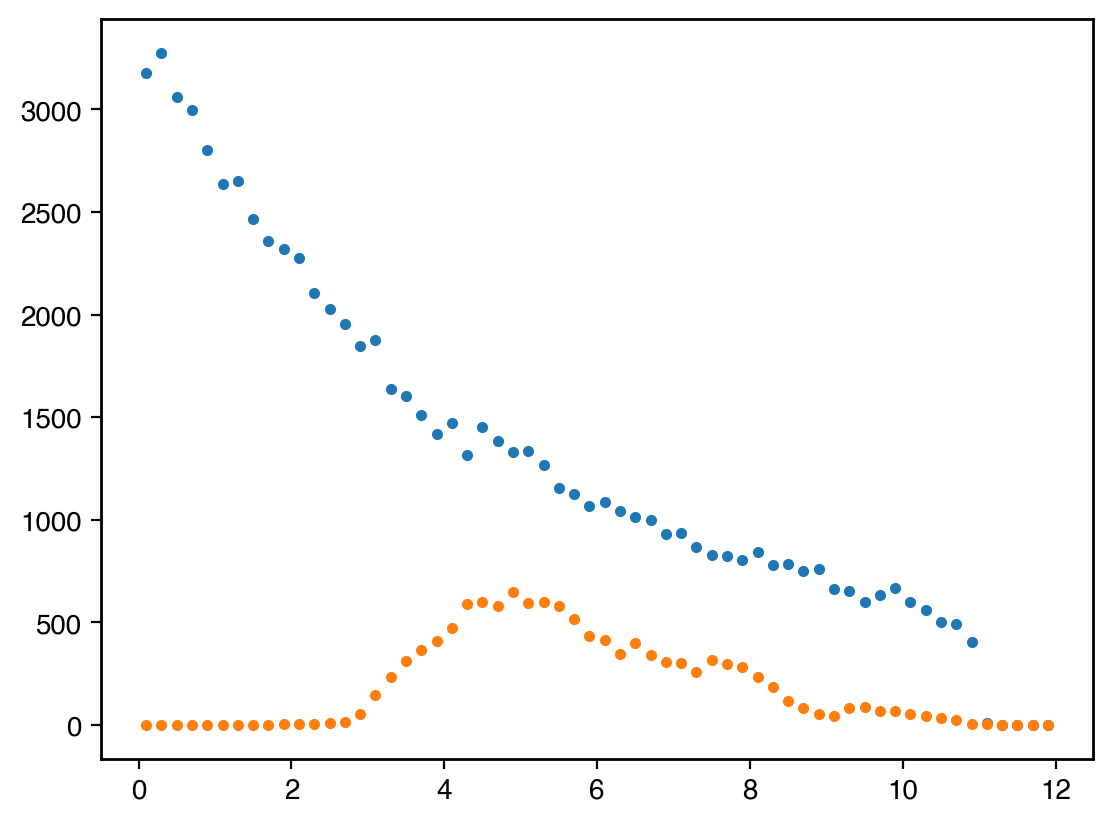

In [77]:
plt.plot(Neutron_E_axis2,eff_flat_correction,'.'
         )
plt.plot(Neutron_E_axis2,Neutron_E_y2,'.')

In [78]:
correct_bar_y = Neutron_E_y2.copy()
correct_bar_y[10:55] = correct_bar_y[10:55]/(eff_flat_correction[10:55]/500)
correct_bar_y[:10] = 0
correct_bar_y[55:] = 0

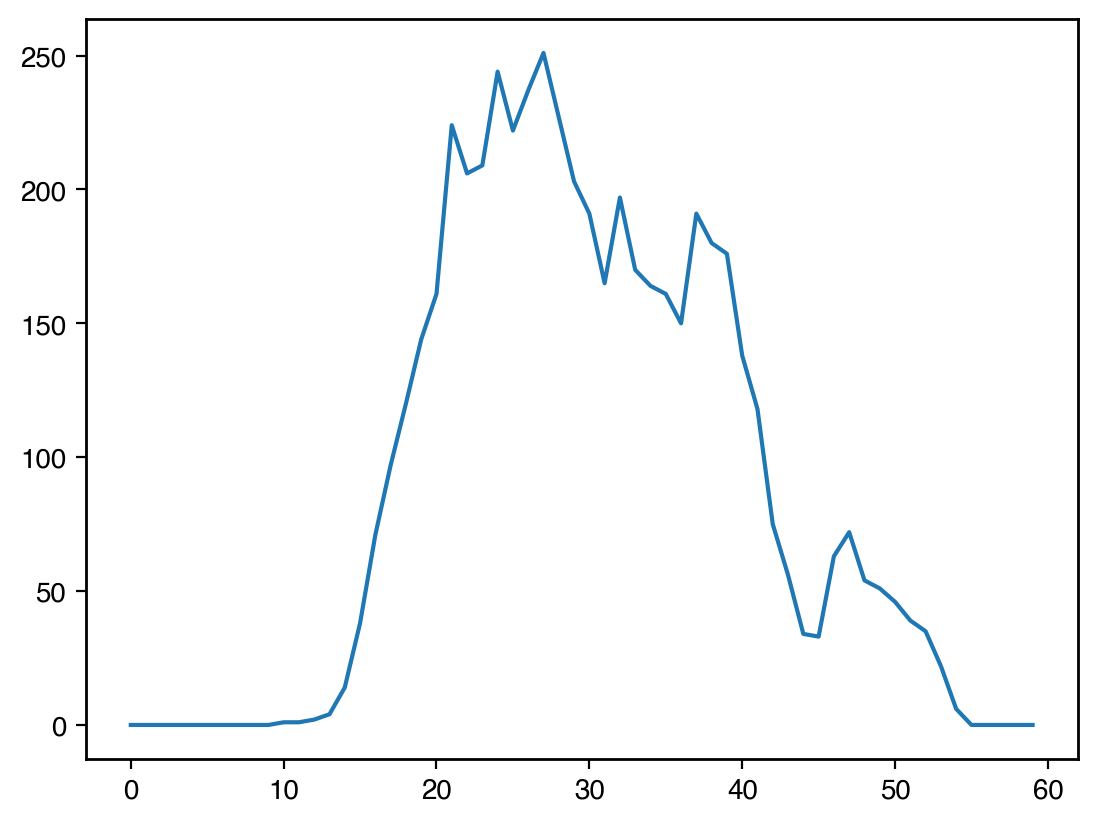

In [79]:
plt.plot(correct_bar_y)

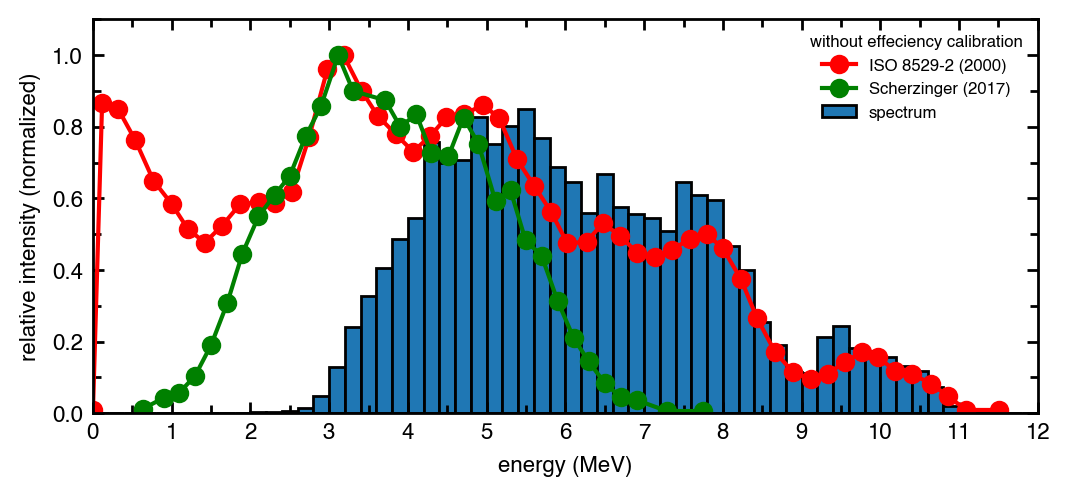

In [80]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis2, 0.85*correct_bar_y/correct_bar_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)


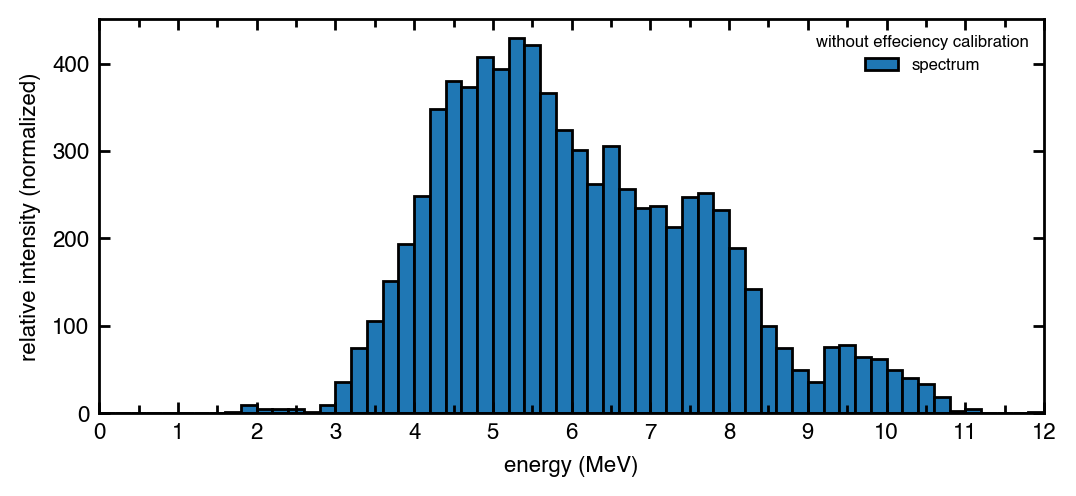

In [81]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y,width=0.2,edgecolor = "k",label= 'spectrum')
#plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),xticks=(1,0.5)
             #,ylim=(0,1.1),yticks=(0.2,0.1)
             ,xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [82]:
#flat_efficiency = np.loadtxt('../Neutron_scatter_exp_simulation/flat_specturm_efficiency.txt')
Deg60_efficiency = np.loadtxt('../Neutron_scatter_exp_simulation/Deg60_TOF_effciency_threshold.txt')



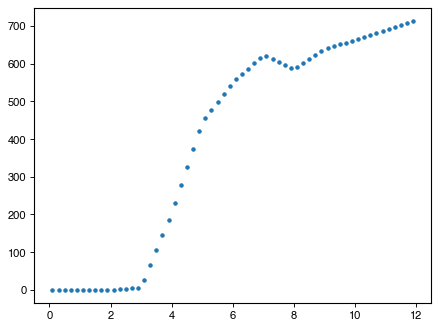

In [83]:
Deg60_efficiency_y = interpolation_function(Deg60_efficiency[:,0],Deg60_efficiency[:,1],Neutron_E_axis)
plt.plot(Neutron_E_axis,Deg60_efficiency_y,'.')


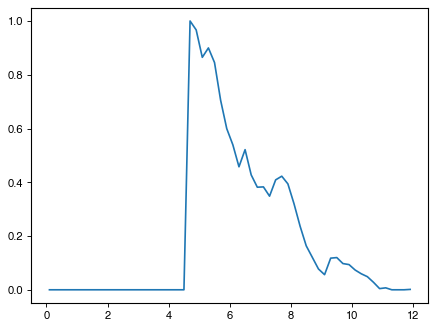

In [84]:
eff_corrected_spectrum =np.zeros(len(Neutron_E_axis))
for i in np.arange(0, len(eff_corrected_spectrum),1):
    if ((Deg60_efficiency_y[i] ==0) or (Neutron_E_axis[i] <=4.5)):
        eff_corrected_spectrum[i]=0
    else:
        eff_corrected_spectrum[i] = Neutron_E_y[i]/Deg60_efficiency_y[i]
plt.plot(Neutron_E_axis,eff_corrected_spectrum)

In [85]:
calibrated_spectrum = Neutron_E_y[0:50]/flat_efficiency[0:50]

NameError: name 'flat_efficiency' is not defined

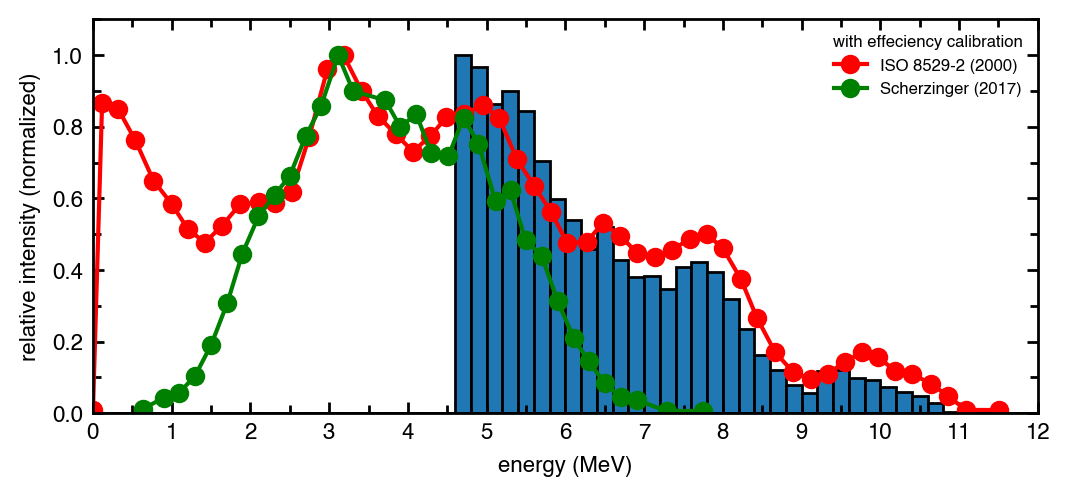

In [86]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


#ax.bar(Neutron_E_axis[0:50], 0.85*(calibrated_spectrum)/np.max(calibrated_spectrum),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

ax.bar(Neutron_E_axis,eff_corrected_spectrum/eff_corrected_spectrum.max(),width=0.2,edgecolor = "k")
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='with effeciency calibration')
#plt.legend(fontsize=18)




In [87]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_E_y[:,np.newaxis]))
np.savetxt("Deg60_N_scatter_20221113.txt",output_N_scatter)

# consider the angle 

In [88]:
mask_rec_threshold2 = proEEWeff_data["Rec_LO"]>0.2
mask_tri_threshold2 = proEEWeff_data["Tri_LO"]>0.3
mask_angle_lower = proEEWeff_data["angle"]>0
mask_angle_upper = proEEWeff_data["angle"]<90
proEEWeffTh_data2 = proEEWeff_data[(mask_rec_threshold2
                                    & mask_tri_threshold2
                                    & mask_angle_lower
                                    & mask_angle_upper
                                    )]
proEEWeffTh2_data = proEEWeff_data[(mask_rec_threshold2&mask_tri_threshold2)]

In [89]:
#print(proEEWeffTh2_data)

In [90]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data2['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

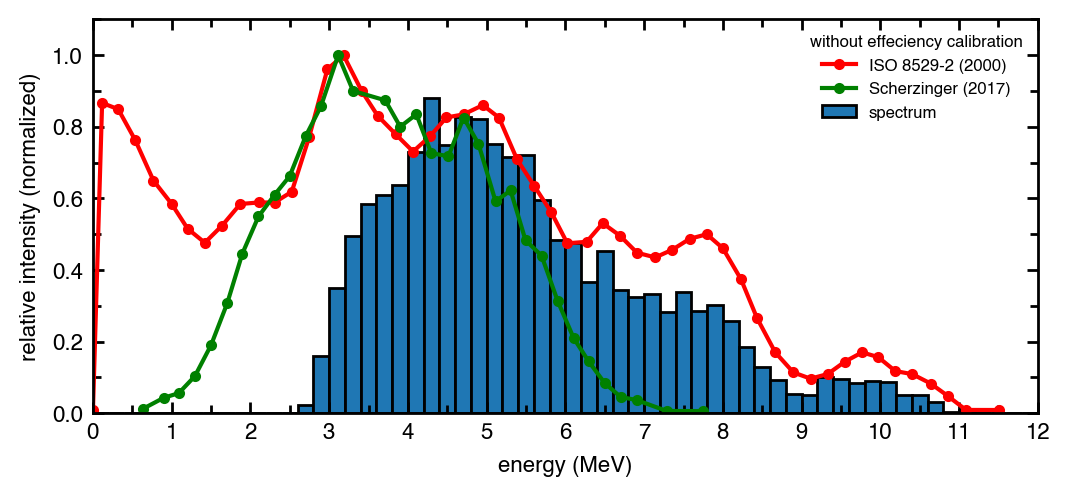

In [91]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, 0.88*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'.-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'.-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [92]:
bin_width=0.2
spectrum_x_s = np.arange(0,20,bin_width)
spectrum_hist_s = np.zeros(len(spectrum_x_s))
for i in np.arange(0,len(proEEWeffTh2_data['Total_E']),1):
    if ((proEEWeffTh2_data.iloc[[i],[11]].values > 0)&(proEEWeffTh2_data.iloc[[i],[10]].values>0)):
        spectrum_hist_s[int(np.round((proEEWeffTh2_data.iloc[[i],[9]].values*(bin_width**-1)),0))] += ((proEEWeffTh2_data.iloc[[i],[11]].values)**-1)*(proEEWeffTh2_data.iloc[[i],[10]].values**-1)


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

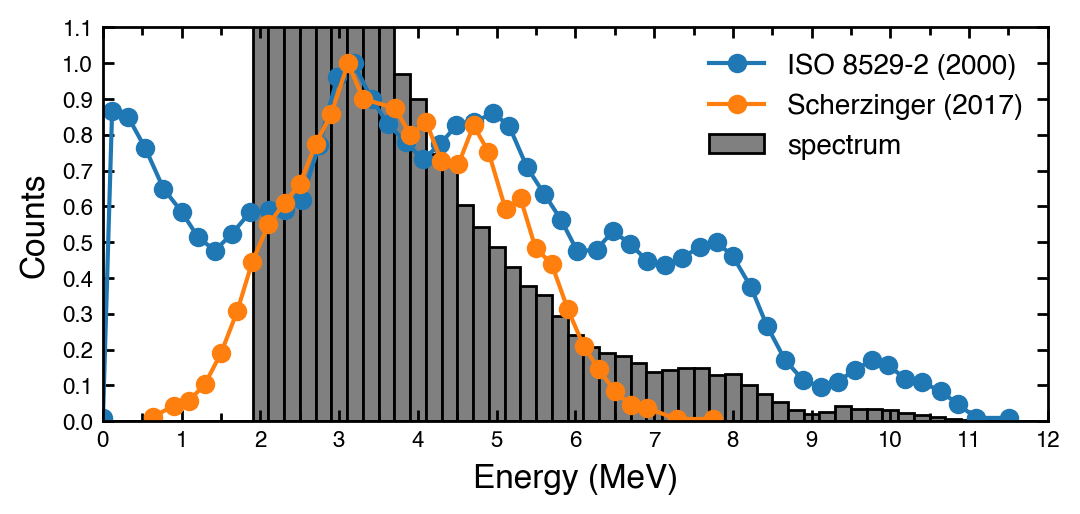

In [93]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(0+spectrum_x_s, 0.9*spectrum_hist_s/spectrum_hist_s[20:].max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')

fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=10,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [94]:
proEEWeff_data_high_E_LLD_mask = proEEWeff_data['Total_E']>4.8
proEEWeff_data_high_E_ULD_mask = proEEWeff_data['Total_E']<5.2
proEEWeff_data_high_E = proEEWeff_data[(proEEWeff_data_high_E_LLD_mask&proEEWeff_data_high_E_ULD_mask)]